__Описание проекта:__ Владелец молочного хозяйства «Вольный луг» хочет купить коров, чтобы расширить поголовье стада. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям.
Требуется разработать две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

__Описание данных:__

Данные представлены тремя датасетами:

ferma_main.csv

ferma_dad.csv

cow_buy.csv

<span style="color:blue">Файл ferma_main.csv содержит данные о стаде фермера на текущий момент.</span> 

Описание данных:

id — уникальный идентификатор коровы.

Удой, кг — масса молока, которую корова даёт в год (в килограммах).

ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.

Сырой протеин, г — содержание сырого протеина в корме (в граммах).

СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Жирность,% — содержание жиров в молоке (в процентах).

Белок,% — содержание белков в молоке (в процентах).

Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

<span style="color:blue">Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера.</span>

Описание данных:

id — уникальный идентификатор коровы.

Имя Папы — имя папы коровы.

<span style="color:blue">Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.</span> 

Описание данных:

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Имя_папы — имя папы коровы.

Текущая_жирность,% — содержание жиров в молоке (в процентах).

Текущий_уровень_белок,% — содержание белков в молоке (в процентах).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.

Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%. Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать.

__Цель проекта:__ Предсказать Удой, кг и Вкус молока коров ассоциации пастбищ «ЭкоФерма», чтобы на основании этих данных выбрать коров для покупки

__Ход проекта:__

Шаг 1. Загрузка и изучение данных

Шаг 2. Предобработка данных

Шаг 3. Исследовательский анализ данных

Шаг 4. Проведение корреляционного анализа признаков в датасете ferma_main.csv

Шаг 5. Задача регрессии

Шаг 6. Задача классификации

Шаг 7. Итоговые выводы

## Загрузка данных

In [1]:
#импорт необходимых библиотек
import pandas as pd
#импортируем библиотеку matplotlib.pyplot для построения визуальных представлений данных
import matplotlib.pyplot as plt
#импортируем библиотеку для работы с массивами
import numpy as np
#импортируем библиотеку для проведения статистических тестов
from scipy import stats as st
#импортируем библиотеку для построения диаграммы размаха
import seaborn as sns
# импортируйте функцию для разделения датасета на выборки
from sklearn.model_selection import train_test_split
# импортируем класс для прямого кодирования
from sklearn.preprocessing import OneHotEncoder
# импортируем класс для масштабирования стандартизацией
from sklearn.preprocessing import StandardScaler
# импортируем класс, который позволяет создать модель линейной регрессии
from sklearn.linear_model import LinearRegression
# импортируем функцию для расчета коэффициента детерминации
from sklearn.metrics import r2_score
# импортируем методы для расчета метрик MSE, MAE, RMS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# импортируем класс, который позволяет создать модель логистической регрессии
from sklearn.linear_model import LogisticRegression
# импортируем методы для оценки качества классификации
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# импортируем метод для построения матрицы ошибок
from sklearn.metrics import confusion_matrix
# импорт метода для преобразования нечисловых признаков в числовые
from sklearn.preprocessing import LabelEncoder
#настройка размера графиков
plt.rcParams["figure.figsize"] = (15,10)
sns.set_style('whitegrid')

In [2]:
#извлекаем данные из файлов
ferma_main=pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
#выведем названия столбцов
print(ferma_main.columns)
#выполним переименование столбцов
ferma_main=ferma_main.rename(columns={'id':'id', 'Удой, кг':'milk_yield_kg', 'ЭКЕ (Энергетическая кормовая единица)':'eke',
       'Сырой протеин, г':'crude_protein_g','СПО (Сахаро-протеиновое соотношение)':'spo', 'Порода':'breed',
       'Тип пастбища':'pasture_type', 'порода папы_быка':'dad_breed', 'Жирность,%':'fat_percent', 'Белок,%':'protein_percent',
       'Вкус молока':'taste', 'Возраст':'age'})
#просмотр информации о составе и типе данных
ferma_main.info()
#просмотр данных
ferma_main.head()

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               634 non-null    int64  
 1   milk_yield_kg    634 non-null    int64  
 2   eke              634 non-null    float64
 3   crude_protein_g  634 non-null    int64  
 4   spo              634 non-null    float64
 5   breed            634 non-null    object 
 6   pasture_type     634 non-null    object 
 7   dad_breed        634 non-null    object 
 8   fat_percent      634 non-null    float64
 9   protein_percent  634 non-null    float64
 10  taste            634 non-null    object 
 11  age              634 non-

,id,milk_yield_kg,eke,crude_protein_g,spo,breed,pasture_type,dad_breed,fat_percent,protein_percent,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [3]:
ferma_main['spo'].unique()

array([0.89 , 0.885, 0.93 , 0.94 , 0.895, 0.95 , 0.96 , 0.85 , 0.84 ,
       0.86 , 0.88 , 0.9  ])

In [4]:
ferma_dad=pd.read_csv('/datasets/ferma_dad.csv', sep=';')
#выведем названия столбцов
print(ferma_dad.columns)
#выполним переименование столбцов
ferma_dad=ferma_dad.rename(columns={'id':'id', 'Имя Папы':'dad_name'})
#просмотр информации о составе и типе данных
ferma_dad.info()
#просмотр данных
ferma_dad.head()

Index(['id', 'Имя Папы'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [5]:
cow_buy=pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')
#выведем названия столбцов
print(cow_buy.columns)
#выполним переименование столбцов
cow_buy=cow_buy.rename(columns={'Порода':'breed', 'Тип пастбища':'pasture_type', 'порода папы_быка':'dad_breed', 'Имя_папы':'dad_name',
       'Текущая_жирность,%':'fact_fat_percent', 'Текущий_уровень_белок,%':'fact_protein_percent', 'Возраст':'age'})
#просмотр информации о составе и типе данных
cow_buy.info()
#просмотр данных
cow_buy.head()

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   breed                 20 non-null     object 
 1   pasture_type          20 non-null     object 
 2   dad_breed             20 non-null     object 
 3   dad_name              20 non-null     object 
 4   fact_fat_percent      20 non-null     float64
 5   fact_protein_percent  20 non-null     float64
 6   age                   20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,breed,pasture_type,dad_breed,dad_name,fact_fat_percent,fact_protein_percent,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


__Вывод:__ Была выполнена загрузка данных представленных csv файлами с разделителем столбцов ';' и разделителем десятичной дроби ','. Названия столбцов приведены к "змеиному регистру" и переведены на английский язык для удобства. Из информации о составе и типе данных видно, что пропусков нет, но требуется выполнить преобразование бинарных данных и поиск явных и неявных дуликатов.

##  Предобработка данных

### Преобразование типов данных

In [6]:
#ferma_main['taste']=ferma_main['taste'].apply(lambda x: 1 if x=='вкусно' else 0).astype('int64')
#проверка уникальных значений в столбце age
ferma_main['age'].unique()
#всего два значения, можем заменить их 1 = более_2_лет, 0 = менее_2_лет и преобразовать тип в int64
ferma_main['age']=ferma_main['age'].apply(lambda x: 1 if x=='более_2_лет' else 0).astype('int64')
#проверка уникальных значений в столбце age датафрейма cow_buy
cow_buy['age'].unique()
#всего два значения, можем заменить их 1 = более_2_лет, 0 = менее_2_лет и преобразовать тип в int64
cow_buy['age']=cow_buy['age'].apply(lambda x: 1 if x=='более_2_лет' else 0).astype('int64')
#просмотр результата
ferma_main.info()
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               634 non-null    int64  
 1   milk_yield_kg    634 non-null    int64  
 2   eke              634 non-null    float64
 3   crude_protein_g  634 non-null    int64  
 4   spo              634 non-null    float64
 5   breed            634 non-null    object 
 6   pasture_type     634 non-null    object 
 7   dad_breed        634 non-null    object 
 8   fat_percent      634 non-null    float64
 9   protein_percent  634 non-null    float64
 10  taste            634 non-null    object 
 11  age              634 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 59.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------

In [7]:
#проверка уникальных значений в столбце taste
#ferma_main['taste'].unique()
#всего два значения, можем заменить их 1 = вкусно, 0 = невкусно
#преобразование целевого признака
target = ferma_main['taste']
# Инициализировать LabelEncoder  
le = LabelEncoder()
# Применить кодировщик к данным и преобразовать категории в целые числа с инвертированием 
encoded_target = 1 - le.fit_transform(target)  
ferma_main['taste']=encoded_target
ferma_main['taste']

0      1
1      1
2      0
3      0
4      1
      ..
629    0
630    0
631    0
632    0
633    0
Name: taste, Length: 634, dtype: int64

### Поиск дубликатов

In [8]:
#выполним поиск явных дубликатов
print(ferma_main.duplicated().sum())
print(ferma_dad.duplicated().sum())
print(cow_buy.duplicated().sum())

5
0
4


In [9]:
#выполним удаление дубликатов
ferma_main = ferma_main.drop_duplicates().reset_index(drop = True)
#проверка результата
#выполним поиск явных дубликатов
print(ferma_main.duplicated().sum())
print(ferma_dad.duplicated().sum())

0
0


In [10]:
#поиск неявных дубликатов в ferma_main
def dup(columns):
    unique_values = ferma_main[columns].unique()
    return unique_values
print(dup('breed'))
print(dup('pasture_type'))
print(dup('dad_breed'))

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']


In [11]:
#исправим опечатки
ferma_main.loc[ferma_main['pasture_type'] == 'Равнинные','pasture_type'] = 'Равнинное'
ferma_main.loc[ferma_main['dad_breed'] == 'Айдиалл','dad_breed'] = 'Айдиал'

In [12]:
#поиск неявных дубликатов в ferma_dad
def dup(columns):
    unique_values = ferma_dad[columns].unique()
    return unique_values
print(dup('dad_name'))

['Буйный' 'Соловчик' 'Барин' 'Геркулес']


In [13]:
#поиск неявных дубликатов в cow_buy
def dup(columns):
    unique_values = cow_buy[columns].unique()
    return unique_values
print(dup('breed'))
print(dup('pasture_type'))
print(dup('dad_breed'))
print(dup('dad_name'))

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']


In [14]:
#исправим опечатки
cow_buy.loc[cow_buy['pasture_type'] == 'равнинное','pasture_type'] = 'Равнинное'
cow_buy.loc[cow_buy['pasture_type'] == 'холмистое','pasture_type'] = 'Холмистое'

In [15]:
#проверка результата
#просмотр информации о составе и типе данных
ferma_main.info()
#просмотр данных
ferma_main.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               629 non-null    int64  
 1   milk_yield_kg    629 non-null    int64  
 2   eke              629 non-null    float64
 3   crude_protein_g  629 non-null    int64  
 4   spo              629 non-null    float64
 5   breed            629 non-null    object 
 6   pasture_type     629 non-null    object 
 7   dad_breed        629 non-null    object 
 8   fat_percent      629 non-null    float64
 9   protein_percent  629 non-null    float64
 10  taste            629 non-null    int64  
 11  age              629 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 59.1+ KB


,id,milk_yield_kg,eke,crude_protein_g,spo,breed,pasture_type,dad_breed,fat_percent,protein_percent,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,1
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,0
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,1
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,1
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,0
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,1,0
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.077,1,1
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинное,Айдиал,3.55,3.076,1,1
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,1,1
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,1,0


In [16]:
#просмотр информации о составе и типе данных
ferma_dad.info()
#просмотр данных
ferma_dad.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [17]:
#просмотр информации о составе и типе данных
cow_buy.info()
#просмотр данных
cow_buy.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   breed                 20 non-null     object 
 1   pasture_type          20 non-null     object 
 2   dad_breed             20 non-null     object 
 3   dad_name              20 non-null     object 
 4   fact_fat_percent      20 non-null     float64
 5   fact_protein_percent  20 non-null     float64
 6   age                   20 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ KB


,breed,pasture_type,dad_breed,dad_name,fact_fat_percent,fact_protein_percent,age
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0


__Вывод:__ В датафреймах ferma_main и cow_buy были удалены явные дубликаты, а так же устранены опечатки в pasture_type и dad_breed. В датафрейме ferma_dad проблем с данными не выявлено.

## Исследовательский анализ данных

### Cтатистический анализ всех признаков

In [18]:
#выведем описание данных для числовых столбцов датафрейма ferma_main
ferma_main.loc[:, ['milk_yield_kg', 'eke', 'crude_protein_g', 'spo', 'fat_percent', 'protein_percent']].describe()

,milk_yield_kg,eke,crude_protein_g,spo,fat_percent,protein_percent
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Из полученного описания числовых данных видим очень большое максимальное значение в столбце "Удой, кг", что свидетельствует о наличии выбросов. По остальным значениям отклонений не видно.

In [19]:
#посчитаем процент вкусного молока
tasty_milk=(ferma_main['taste'].sum()/ferma_main['taste'].count())*100
tasty_milk.round(2)

58.98

In [20]:
#посчитаем процент коров старше 2х лет
old_cow=(ferma_main['age'].sum()/ferma_main['age'].count())*100
old_cow.round(2)

82.51

In [21]:
#выведем количественные показатели по нечисловым столбцам датафрейма ferma_main
for i in list(ferma_main.select_dtypes(include='object').columns):
    count_values = ferma_main[i].value_counts()
    print(count_values)

Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: breed, dtype: int64
Холмистое    351
Равнинное    278
Name: pasture_type, dtype: int64
Айдиал     318
Соверин    311
Name: dad_breed, dtype: int64


In [22]:
#выведем количественные показатели по нечисловым столбцам датафрейма ferma_dad
for i in list(ferma_dad.select_dtypes(include='object').columns):
    count_values = ferma_dad[i].value_counts()
    print(count_values)

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: dad_name, dtype: int64


In [23]:
#выведем описание данных для числовых столбцов датафрейма cow_buy
cow_buy.loc[:, ['fact_fat_percent', 'fact_protein_percent']].describe()

,fact_fat_percent,fact_protein_percent
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


In [24]:
#выведем количественные показатели по нечисловым столбцам датафрейма cow_buy
for i in list(cow_buy.select_dtypes(include='object').columns):
    count_values = cow_buy[i].value_counts()
    print(count_values)

РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: breed, dtype: int64
Равнинное    11
Холмистое     9
Name: pasture_type, dtype: int64
Соверин    12
Айдиал      8
Name: dad_breed, dtype: int64
Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: dad_name, dtype: int64


In [25]:
#посчитаем процент коров старше 2х лет
old_cow=(cow_buy['age'].sum()/cow_buy['age'].count())*100
old_cow.round(2)

75.0

### Построение графика для каждого признака

#### Построение графиков для признаков из датафрейма ferma_main

Гистограммы числовых столбцов датафрейма ferma_main


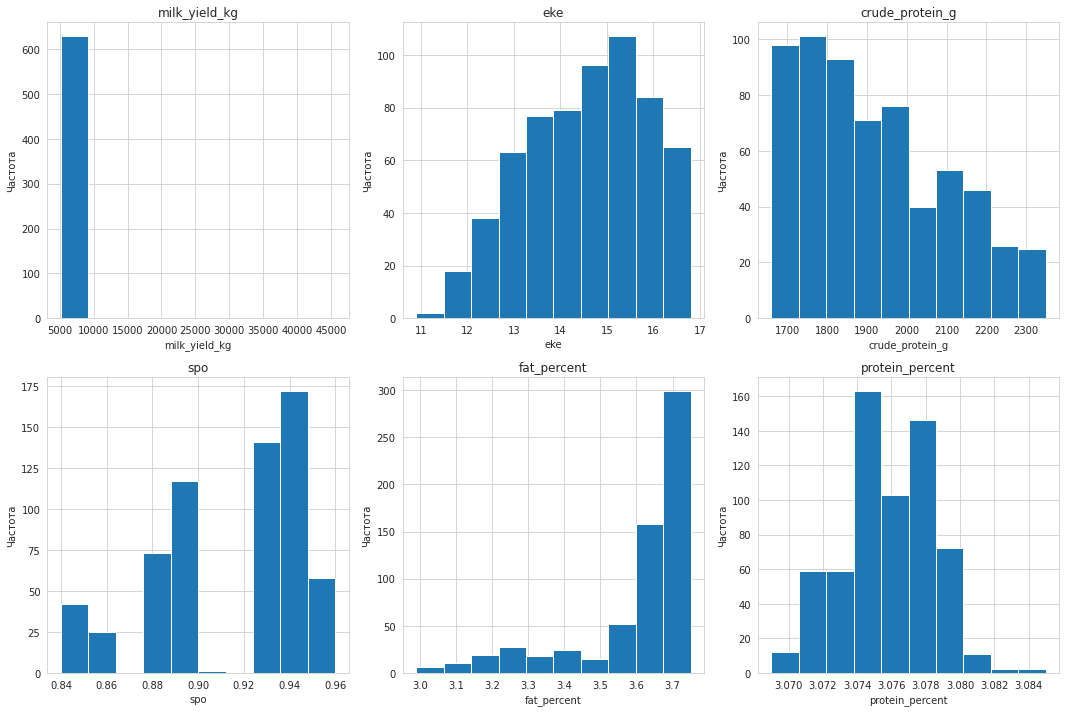

In [26]:
#посторим гистограммы для всех числовых столбцов для оценки распределения данных ferma_main

print("Гистограммы числовых столбцов датафрейма ferma_main")
df_ferma_main=ferma_main.drop(labels='id', axis=1)

columns=['milk_yield_kg', 'eke', 'crude_protein_g', 'spo', 'fat_percent', 'protein_percent']
for i, column in enumerate(columns):
    plt.subplot(2,3,i+1)
    df_ferma_main[column].hist(bins=10)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Гистограммы числовых столбцов датафрейма ferma_main (данные стада фермера)


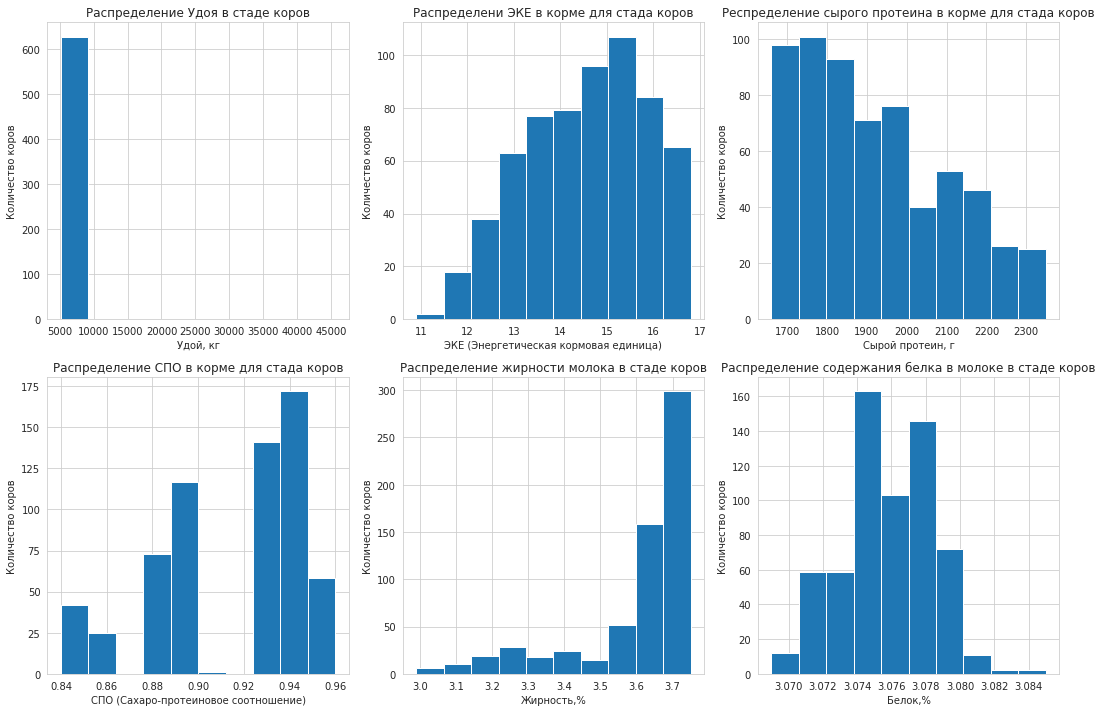

In [27]:
#посторим гистограммы для всех числовых столбцов для оценки распределения данных ferma_main

print("Гистограммы числовых столбцов датафрейма ferma_main (данные стада фермера)")


dictionary = { 
    'milk_yield_kg':['Распределение Удоя в стаде коров', 'Удой, кг', 'Количество коров'],
    'eke':['Распределени ЭКЕ в корме для стада коров','ЭКЕ (Энергетическая кормовая единица)','Количество коров'],
    'crude_protein_g':['Респределение сырого протеина в корме для стада коров','Сырой протеин, г','Количество коров'],
    'spo':['Распределение СПО в корме для стада коров','СПО (Сахаро-протеиновое соотношение)','Количество коров'],
    'fat_percent':['Распределение жирности молока в стаде коров','Жирность,%','Количество коров'],
    'protein_percent':['Распределение содержания белка в молоке в стаде коров','Белок,%','Количество коров']
}

columns=['milk_yield_kg', 'eke', 'crude_protein_g', 'spo', 'fat_percent', 'protein_percent']
for i, column in enumerate(columns):
    plt.subplot(2,3,i+1)
    df_ferma_main[column].hist(bins=10)
    for tag, values in dictionary.items(): 
        if column == tag:
            plt.title(values[0])
            plt.xlabel(values[1])
            plt.ylabel(values[2])
    
plt.tight_layout()
plt.show()
    

In [28]:
#явный выброс есть только в данных milk_yield_kg, выведем строку с выбросами отдельно
blowout_milk_yield_kg=ferma_main.query('milk_yield_kg > 40000')
blowout_milk_yield_kg

,id,milk_yield_kg,eke,crude_protein_g,spo,breed,pasture_type,dad_breed,fat_percent,protein_percent,taste,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,1,1


In [29]:
#значение похожее на выброс всего одно, это явно ошибка сбора данных, удалим его
ferma_main = ferma_main.query('id != 17').reset_index(drop=True)

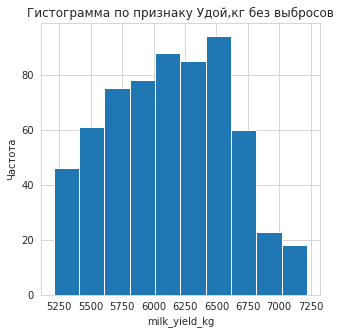

In [30]:
#проверим результат
ferma_main['milk_yield_kg'].hist(figsize=(5, 5))
plt.title("Гистограмма по признаку Удой,кг без выбросов")
plt.xlabel('milk_yield_kg')
plt.ylabel('Частота')
plt.show()

Диаграмма размаха для числовых признаков датафрейма ferma_main


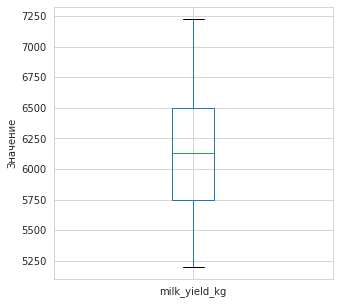

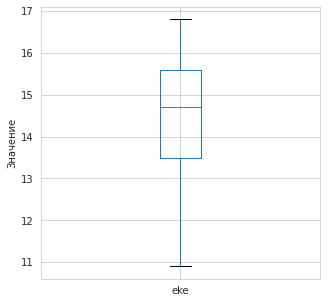

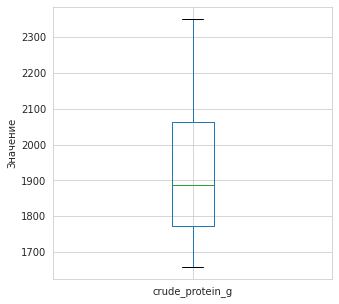

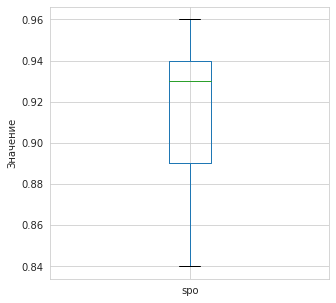

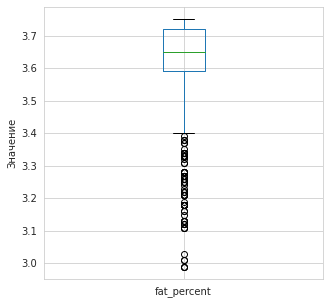

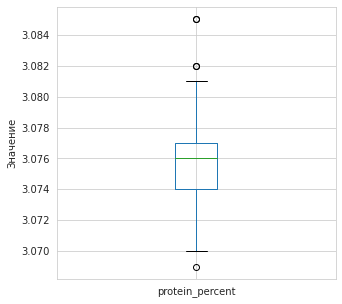

In [31]:
#для дополнительного анализа выбросов построим диаграмму размаха для всех числовых признаков
print('Диаграмма размаха для числовых признаков датафрейма ferma_main')
column=['milk_yield_kg','eke','crude_protein_g','spo','fat_percent','protein_percent']
for i in column:
    ferma_main.boxplot(i, figsize=(5, 5))
    plt.ylabel('Значение')
    plt.show()

In [32]:
#наблюдаются выбросы у признаков fat_percent и protein_percent, расмотрим их детально
ferma_main.loc[ferma_main['fat_percent'] < 3.4]
ferma_main.loc[(ferma_main['protein_percent'] > 3.081) | (ferma_main['protein_percent'] < 3.07 )]

,id,milk_yield_kg,eke,crude_protein_g,spo,breed,pasture_type,dad_breed,fat_percent,protein_percent,taste,age
76,78,5871,14.7,1795,0.895,Вис Бик Айдиал,Равнинное,Айдиал,3.61,3.082,1,1
239,241,5568,13.4,1733,0.880,Вис Бик Айдиал,Равнинное,Соверин,3.63,3.069,0,0
425,427,6701,15.7,2068,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.72,3.082,1,1
470,472,5883,14.9,2159,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.62,3.085,1,1
516,518,5819,13.7,1968,0.840,Вис Бик Айдиал,Холмистое,Айдиал,3.15,3.085,1,1


Количество выбросов у признака fat_percent достаточно большое, удалять их нельзя.
Количествоо выбросов у признака protein_percent незначительное, существенного влияния на анализ они оказать не должны, так же оставим их без изменений.

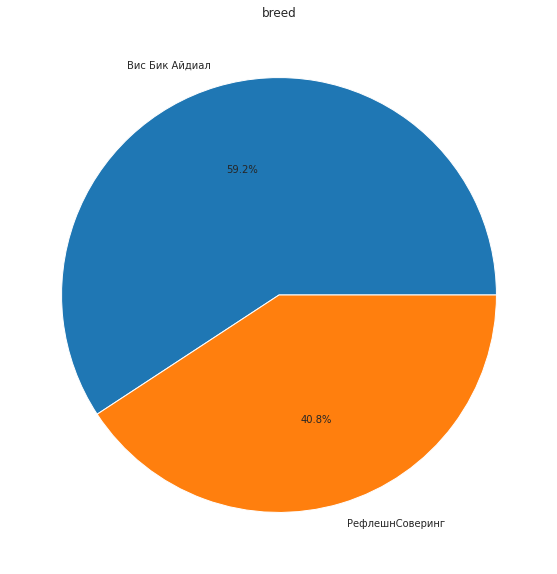

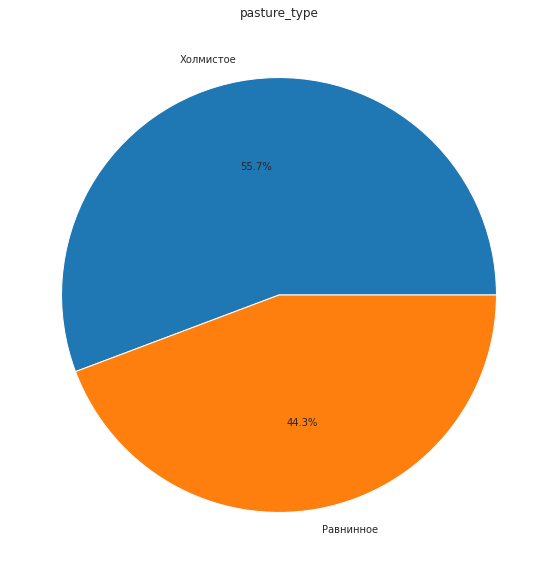

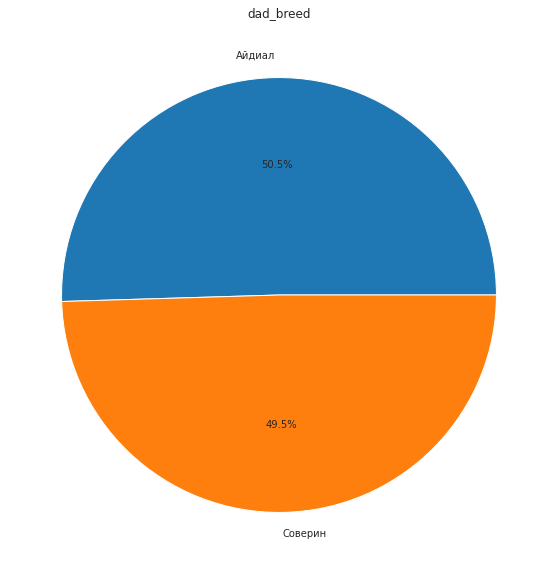

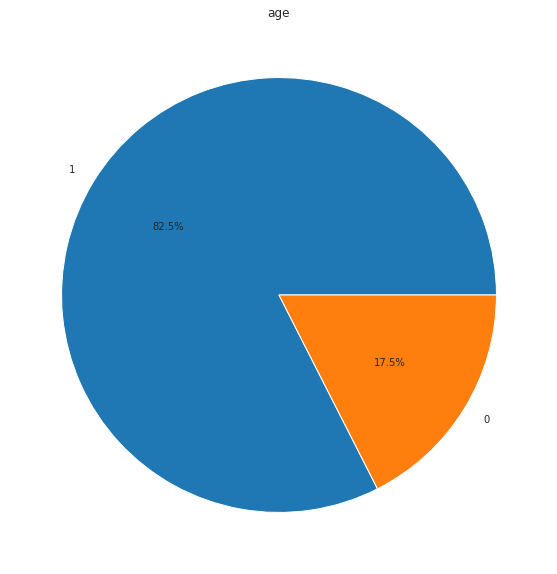

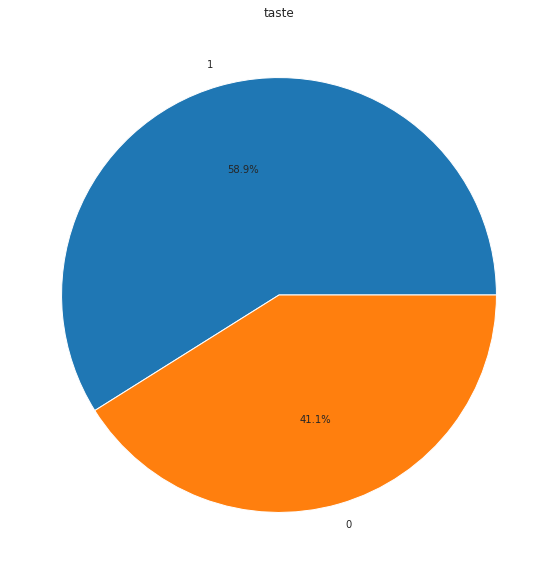

In [33]:
#для категориальных признаков датафрейма построим круговые диаграммы
column=['breed','pasture_type','dad_breed','age','taste']
for i in column:
    data = ferma_main[i].value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title(i)
    plt.show()

По графикам категориальных признаков видно, что:

- почти на 10% больше коров породы "Вис Бик Айдиал"
- на 11% больше пастбищ холмистого типа
- коровы являются потомками быков двух пород и их кол-во почти равно
- в стаде преобладают коровы старше 2х лет
- вкусного молока на 17% больше невкусного

#### Построение графиков для признаков из датафрейма ferma_dad

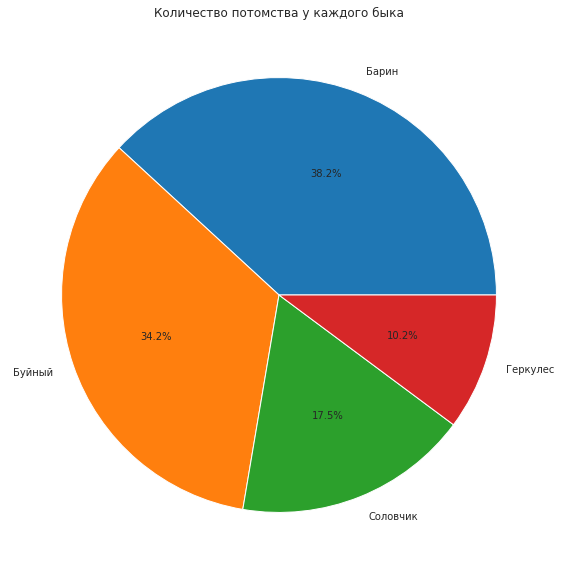

In [34]:
#в дата фрейме ferma_dad присутствуют только категориальный признак. Построим по нему круговую диаграмму
column=['dad_name']
for i in column:
    data = ferma_dad[i].value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Количество потомства у каждого быка')
    plt.show()

#### Построение графиков для признаков из датафрейма cow_buy

Гистограммы числовых столбцов датафрейма cow_buy


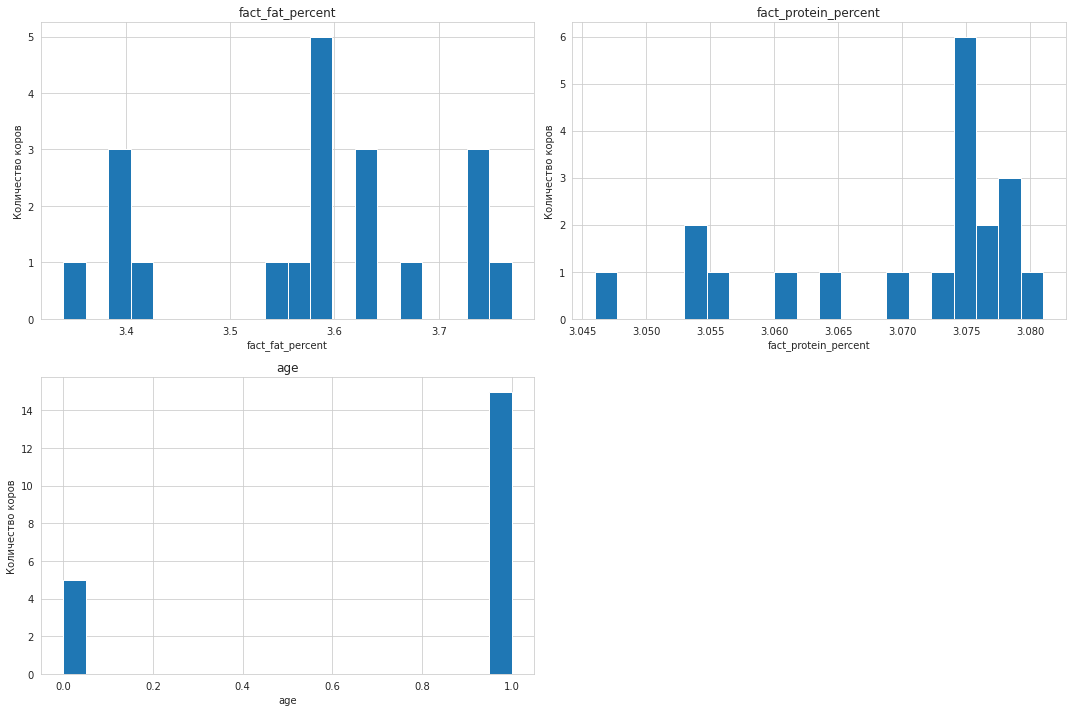

In [35]:
#посторим гистограммы для всех числовых столбцов для оценки распределения данных cow_buy

print("Гистограммы числовых столбцов датафрейма cow_buy")

columns=['fact_fat_percent', 'fact_protein_percent', 'age']
for i, column in enumerate(columns):
    plt.subplot(2,2,i+1)
    cow_buy[column].hist(bins=20)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Количество коров')
plt.tight_layout()
plt.show()

In [36]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   breed                 20 non-null     object 
 1   pasture_type          20 non-null     object 
 2   dad_breed             20 non-null     object 
 3   dad_name              20 non-null     object 
 4   fact_fat_percent      20 non-null     float64
 5   fact_protein_percent  20 non-null     float64
 6   age                   20 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ KB


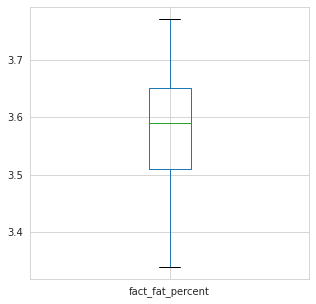

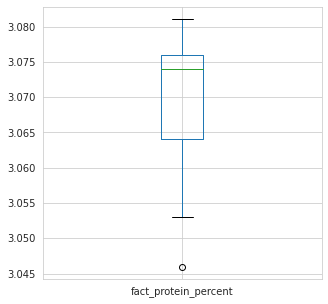

In [37]:
#для дополнительного анализа выбросов построим диаграмму размаха для всех числовых признаков
column=['fact_fat_percent','fact_protein_percent']
for i in column:
    cow_buy.boxplot(i, figsize=(5, 5))
    plt.show()

Выбросы отсутствуют

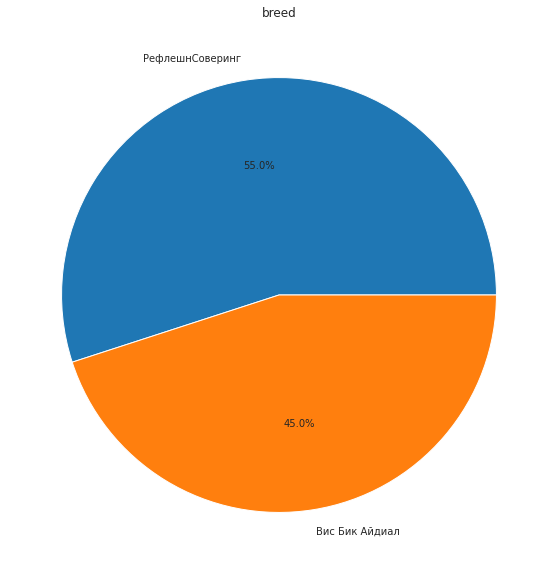

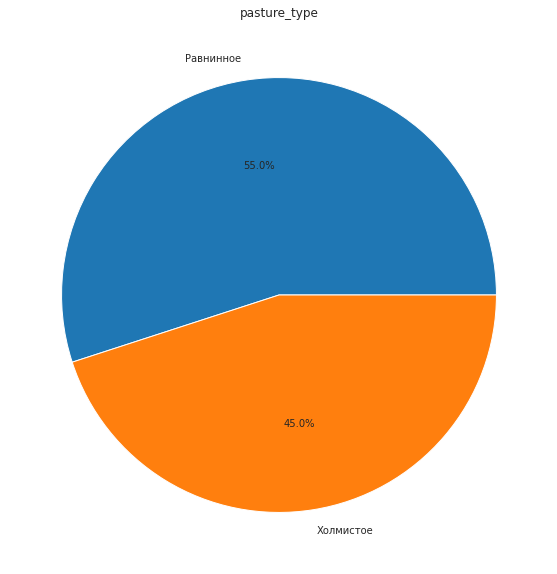

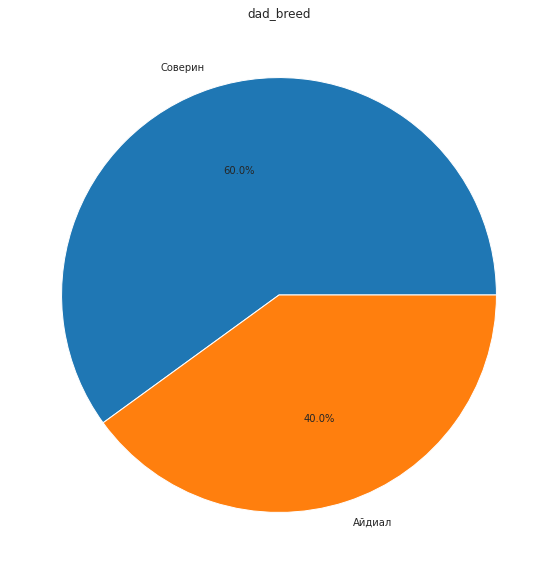

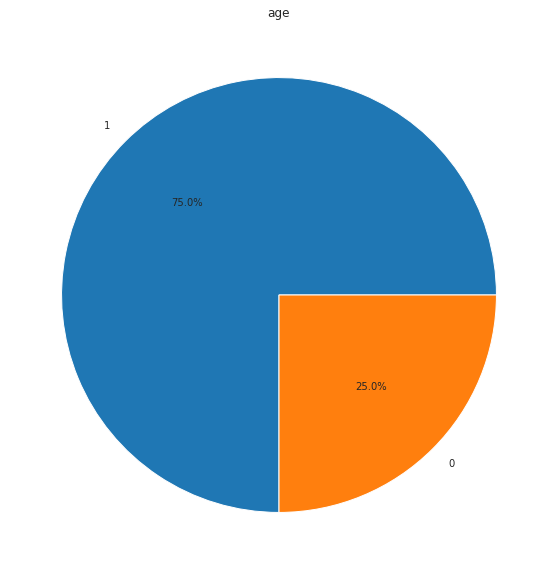

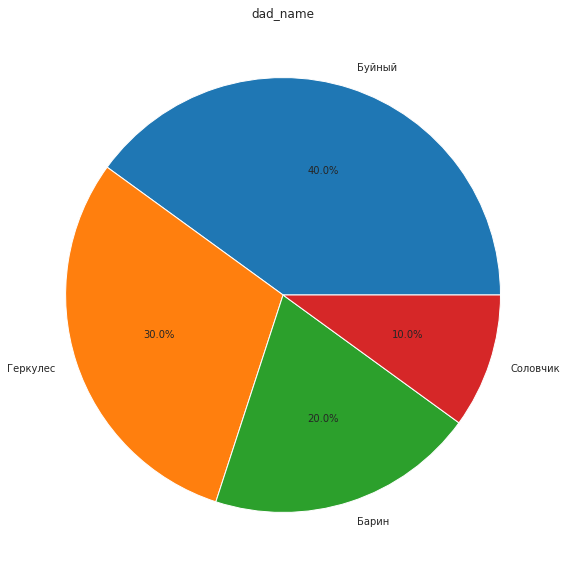

In [38]:
#для категориальных признаков датафрейма построим круговые диаграммы
column=['breed','pasture_type','dad_breed','age','dad_name']
for i in column:
    data = cow_buy[i].value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title(i)
    plt.show()

По графикам категориальных признаков видно, что:

- из 16 коров 8 породы "Вис Бик Айдиал" и 8 породы "РефлешнСоверинг"
- половина посется на пастбищах равнинного типа и половина на холмистых
- коровы являются потомками быков двух пород, при этом почти на 30% больше быков породы "Соверин"
- в стаде преобладают коровы старше 2х лет
- больше всего коров-потомков у быка по кличке Буйный, на 10% меньше у быка по кличке Геркулес и одинаковое кол-во у быков Барин и Соловчик

### Вывод по разделу:

Благодаря проведенному исследовательскому анализу данных был обнаружен выброс в данных о массе молока в датасете по стаду фермера. Строка с выбросом была удалена.
Было обнаружено 86 строк с выбивающимися из общего набора значениями у признака fat_percent, их решено было оставить.
Было обнаружено 6 выбросов у признака protein_percent, количество незначительное, существенного влияния на анализ они оказать не должны, так же оставили их без изменений.
Необычного распределения у количественных признаков незамечено. Удой, ЭКЕ, протеин распределены нормально. Сырой протеин, жирность и СПО похожи на распределение Пуассона.
В данных о коровах для покупки всего 16 позиций, данные выглядят корректными, как-либо улучшать их не требуется.

## Корреляционный анализ

### Корреляционный анализ признаков в датасете ferma_main

<AxesSubplot:>

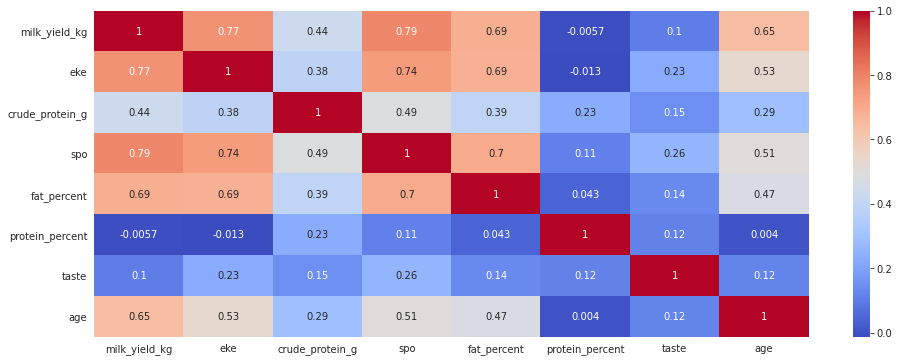

In [39]:
#рассчитаем коэффициенты корреляции между всеми признаками и выведем их в виде тепловой карты
#из-за присутствия и категориальных и дискретных признаков использовать метод Пирсона для расчета корреляции нельзя. 
#можно использовать метод Спирмена или Кендалла, второй отличается нечувствительностью к выбросам
#будем использовать метод Спирмена
#исключим id
ferma_main_corr=ferma_main.drop(columns=['id'], axis=1)
plt.figure(figsize=(16, 6))
sns.heatmap(ferma_main_corr.corr(method='spearman'), cmap="coolwarm", annot=True)

Нас интересует зависимость для целевого признака Удой.
Как видно из тепловой карты Удой больше всего коррелирует с spo, eke

In [40]:
# Создаем базовый скаттерплот для признака Удой, кг с учётом значения категориальных признаков
col_var=['milk_yield_kg', 'eke', 'crude_protein_g', 'spo', 'fat_percent', 'protein_percent'] #количественные признаки
cat_var=['breed','pasture_type','dad_breed'] #категориальные признаки

def scatterplot(x,y):
    for i in cat_var:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(
        x=x,
        y=y,
        hue=i, # Опционально: категориальная переменная для цвета
        data=ferma_main,
        alpha=0.7 # Прозрачность точек
        )
        plt.title(f'Диаграмма рассеяния признака {i}')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        # Добавляем линию регрессии
        sns.regplot(
        x=x,
        y=y,
        data=ferma_main,
        scatter=False, # Не дублируем точки
        line_kws={"color": "red"})
    plt.show()    
    
#запуск функции
#scatterplot('milk_yield_kg', 'eke')

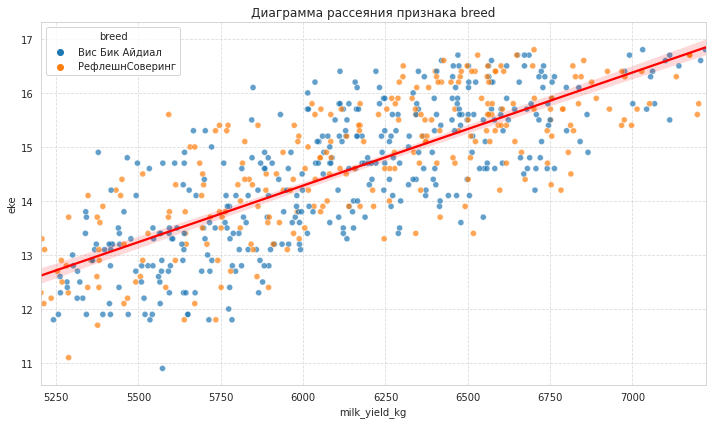

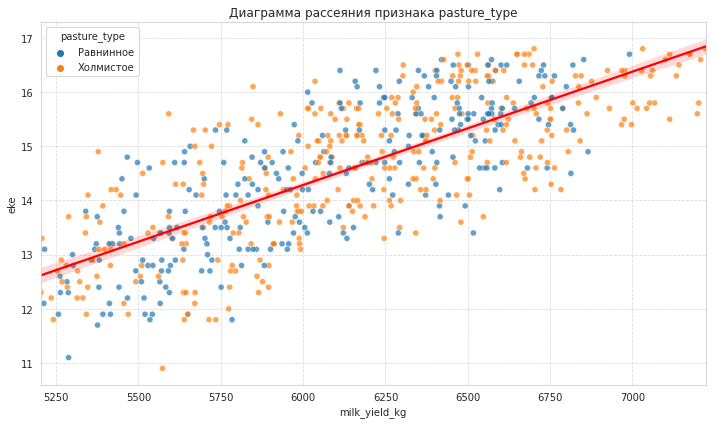

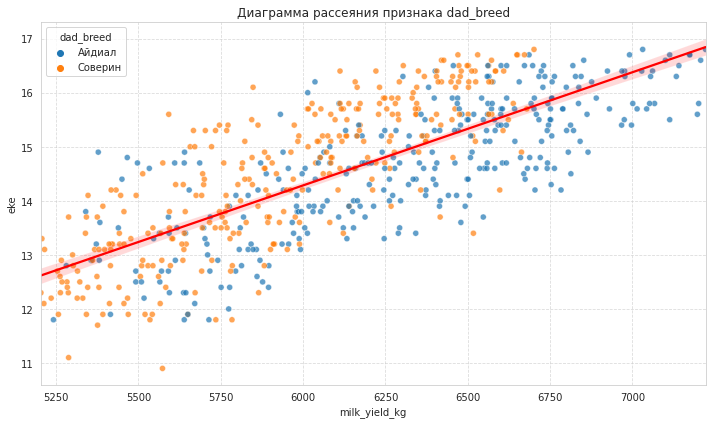

In [41]:
#построим диаграммы рассеяния scatterplot для целевого признака Удой, кг и ЭКЕ (Энергетическая кормовая единица)
scatterplot('milk_yield_kg', 'eke')

Наблюдается высокая линейная корреляция удоя и ЭКЕ. Возможно этот входной признак придется удалить, 
если в дальнешем модель будет показывать некорректный результат.

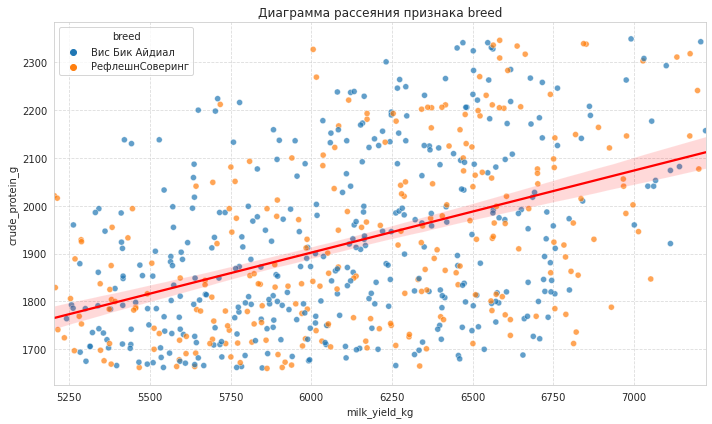

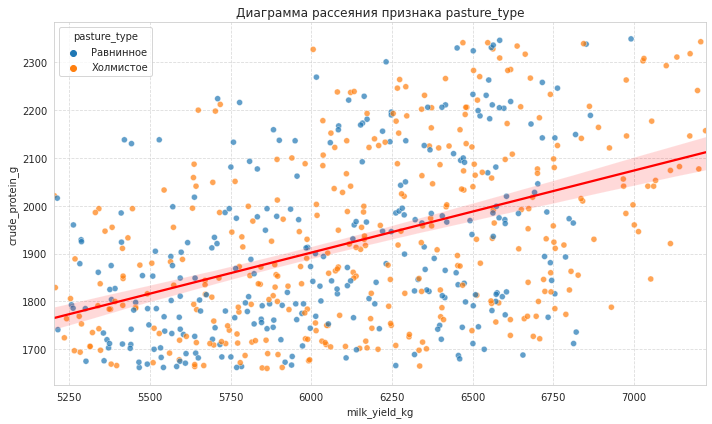

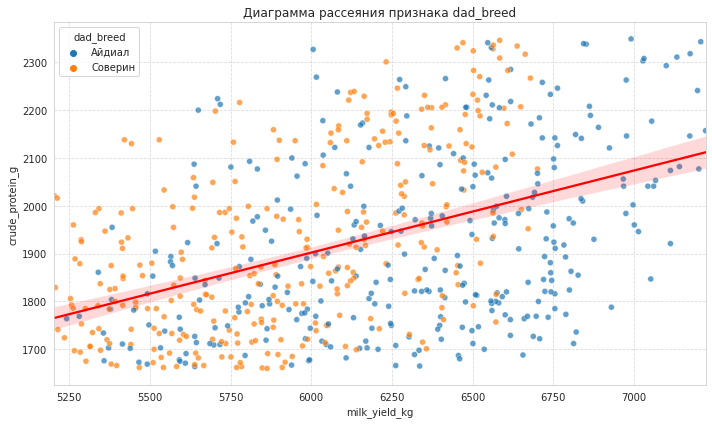

In [42]:
#построим диаграммы рассеяния scatterplot для целевого признака Удой, кг и Сырой протеин, г
scatterplot('milk_yield_kg', 'crude_protein_g')

Зависимость удоя от сырого протеина фактически не наблюдается, точки распределены по всему полю. Корреляция слабая.

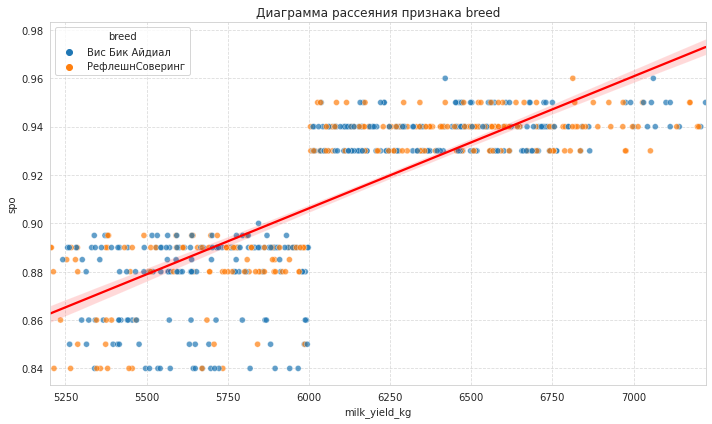

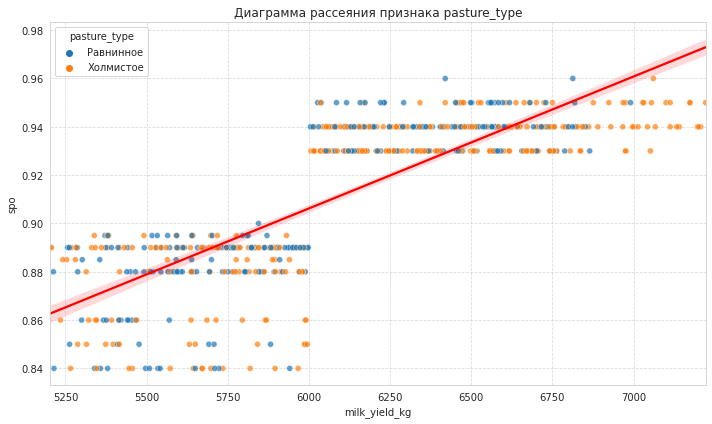

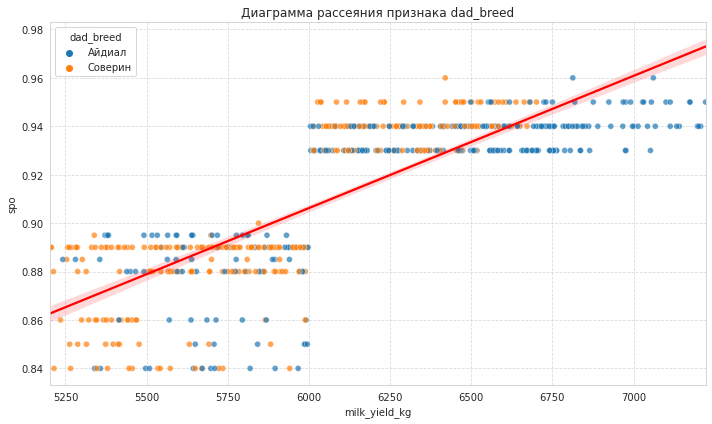

In [43]:
#построим диаграммы рассеяния scatterplot для целевого признака Удой, кг и СПО (Сахаро-протеиновое соотношение)
scatterplot('milk_yield_kg', 'spo')

Есть нелинейная зависимость между удоем и СПО. Корреляция высокая. Возможно этот входной признак придется удалить, 
если в дальнешем модель будет показывать некорректный результат. 
Возможно требуется возвести значения в квадрат, для того, чтобы получить линейную зависимость.

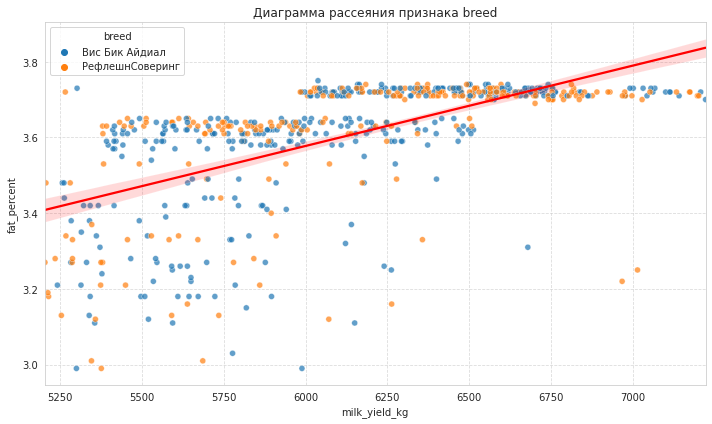

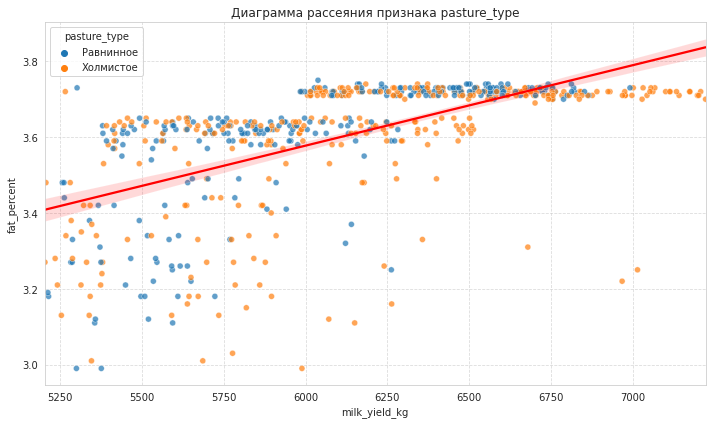

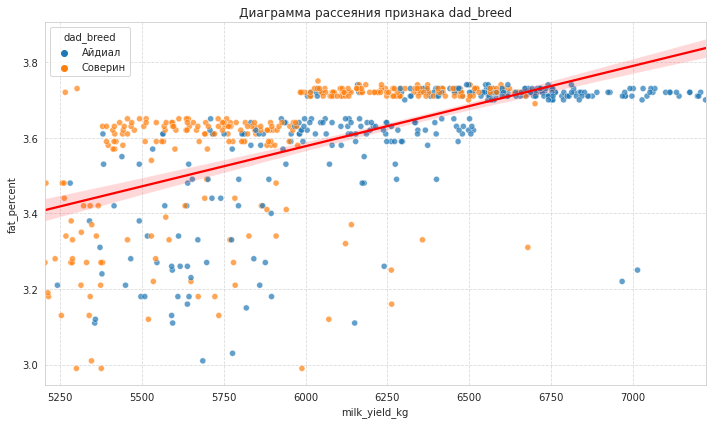

In [44]:
#построим диаграммы рассеяния scatterplot для целевого признака Удой, кг и Жирность,%
scatterplot('milk_yield_kg', 'fat_percent')

Есть нелинейная зависимость между удоем и жирностью, причем жирность и удой выше у коров, от быков породы Айдил. Коэффициент корреляции заметный 0.6. Возможно требуется возвести значения в квадрат, для того, чтобы получить линейную зависимость.

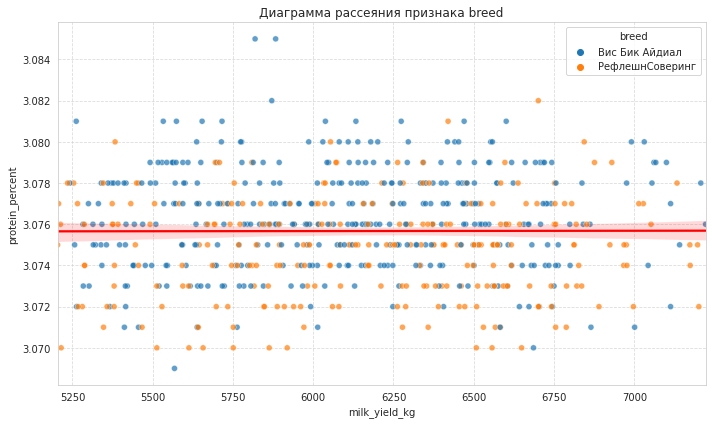

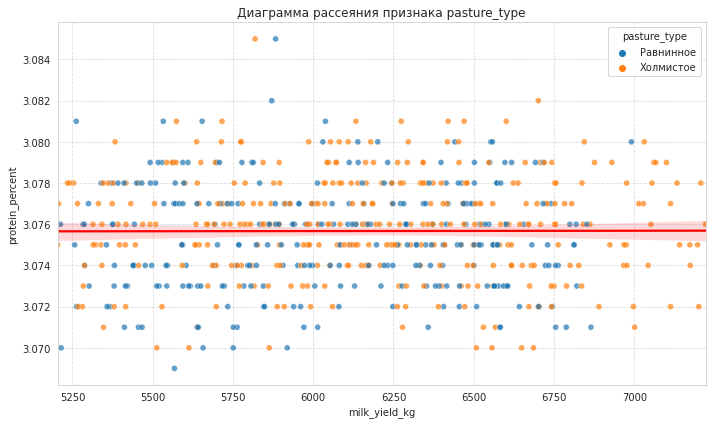

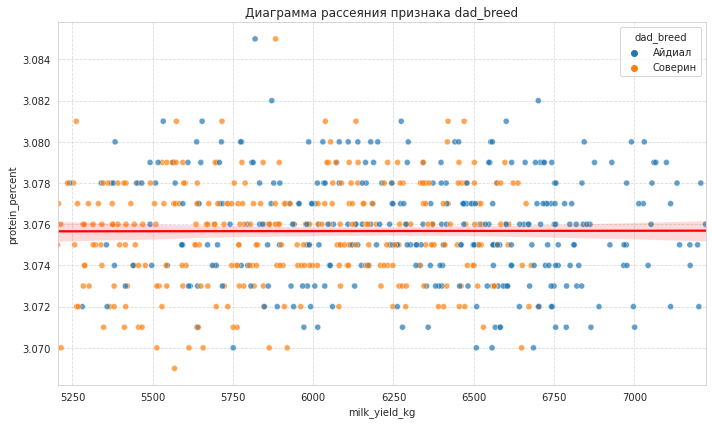

In [45]:
#построим диаграммы рассеяния scatterplot для целевого признака Удой, кг и Белок,%
scatterplot('milk_yield_kg', 'protein_percent')

Зависимость между удоем и процентом белка отсутствует.

#### Выводы по разделу:
Была построена тепловая карта по расчитанным коэффициентам корреляции.
Были построены диаграммы рассеяния для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.
Расчеты и графики показали возможную мультиколлинеарность между признаками spo и eka, для ее устранения возможно придется один из признаков в дальнейшем удалить.

## Обучение модели линейной регрессии

#### Первая модель

Как показал корреляционный анализ признаками влияющими на удой являются spo, eke, age, dad_breed.
В описании датасета выделены следующие группы признаков:
Характеристики коровы: id, Порода, порода папы_быка, Возраст.
Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
Характеристика пастбища: Тип пастбища.
Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
Для более качественного построения модели, во входные признаки должны попасть признаки из каждой группы, поэтому добавим вы выборку тип пастбища.

#### Разбьем данные на тренировочную и тестовую выборки

In [46]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42
# выделяем в отдельные переменные целевой признак и входные признаки
X = ferma_main[['eke','spo','age', 'dad_breed','pasture_type']]
y = ferma_main['milk_yield_kg']
# разделите данные на тренировочные и тестовые, зафиксируйте random_state
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

#### Кодируем категориальные признаки с помощью OneHotEncoder

In [47]:
cat_col_names = ['age', 'dad_breed', 'pasture_type'] #категориальные признаки
# создаем переменную с экземпляром класса OneHotEncoder()
# включаем параметр для избегания появления дамми-ошибок,
# отключаем sparse-отображение
encoder = OneHotEncoder(sparse=False, drop='first')
# обучаем и трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполняем преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

#смотрим результат
print(X_train_ohe.head())
X_test_ohe.head()

   x0_1  x1_Соверин  x2_Холмистое
0   1.0         1.0           1.0
1   0.0         1.0           1.0
2   1.0         0.0           0.0
3   1.0         0.0           1.0
4   1.0         0.0           0.0


,x0_1,x1_Соверин,x2_Холмистое
0,1.0,0.0,1.0
1,1.0,1.0,1.0
2,0.0,1.0,1.0
3,1.0,1.0,0.0
4,1.0,1.0,1.0


#### Масштабируем количественные признаки с помощью StandardScaler

In [48]:
num_col_names = ['eke', 'spo']#количественные признаки
# создаем переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()
# обучаем и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполняем преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

#создаём тренировочный и тестовый датафреймы из отмасштабированных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
#смотрим результат
print(X_train_scaled.head())
X_test_scaled.head()

        eke       spo
0  1.502378  0.837130
1 -1.557270 -0.703660
2  0.125537 -1.011818
3 -0.103937  0.837130
4 -1.098323 -0.703660


,eke,spo
0,-0.486393,-1.011818
1,1.425887,0.837130
2,-0.486393,-1.628134
3,-0.945340,-1.011818
4,0.584484,-0.703660


#### Объединяем отмасштабированные и закодированные данные в новые датафреймы

In [49]:
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# выведите пять первых строк из тренировочного датафрейма командой print()
print(X_train.head(5))

   x0_1  x1_Соверин  x2_Холмистое       eke       spo
0   1.0         1.0           1.0  1.502378  0.837130
1   0.0         1.0           1.0 -1.557270 -0.703660
2   1.0         0.0           0.0  0.125537 -1.011818
3   1.0         0.0           1.0 -0.103937  0.837130
4   1.0         0.0           0.0 -1.098323 -0.703660


#### Обучаем модель линейной регрессии на подготовленных данных

In [50]:
# инициализируем модель линейной регрессии
model_lr  = LinearRegression()

# обучаем модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получаем предсказания модели на тестовых данных 
predictions1 = model_lr.predict(X_test)

# вывод вторых предсказанного и настоящего значений
print(predictions1[1], y_test.reset_index(drop=True)[1])

6461.928073004032 6512


R2 LinearRegression = 0.7791735913230107


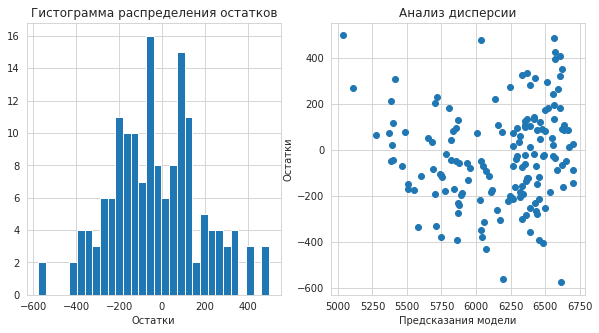

In [51]:
#оцениваем качество модели на тестовой выборке: рассчитываем R², анализируем остатки с помощью графиков
#рассчитаем коэффициент детерминации
r2 = r2_score(y_test, predictions1)
# выведите полученное значение R2
print("R2 LinearRegression =", r2)

#анализируем остатки с помощью графиков
# рассчитаем остатки
residuals1 = y_test - predictions1
# строим графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals1, bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions1, residuals1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Полученное значение R2 равно 0.77 и близко к 1, это говорит о том, что модель в 77% случаем не ошибается.
На графике дисперсии наблюдается разброс значений в левую сторону. Модель или данные требуется доработать.

#### Вторая модель

In [52]:
#устраним нелинейную зависимость между СПО и Удоем, разделив СПО на две категории, "меньше 0.92" = 1 и "больше 0.92" = 2
ferma_main['spo_bin']=ferma_main['spo'].apply(lambda x: 1 if x >=0.92 else 0).astype('int64')

#устраним нелинейную зависимость между ЭКЕ и Удоем, добавим новый признак ЭКЕ в квадрате
ferma_main['eke_2']=ferma_main['eke']**2

In [53]:
#проверим результат
ferma_main.head(10)

,id,milk_yield_kg,eke,crude_protein_g,spo,breed,pasture_type,dad_breed,fat_percent,protein_percent,taste,age,spo_bin,eke_2
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,1,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,0,0,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,1,0,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,1,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,0,0,163.84
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,1,0,0,161.29
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.077,1,1,0,174.24
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинное,Айдиал,3.55,3.076,1,1,1,216.09
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,1,1,1,201.64
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,1,0,0,179.56


   x0_1  x1_Соверин  x2_Холмистое  x3_1
0   1.0         1.0           1.0   1.0
1   0.0         1.0           1.0   0.0
2   1.0         0.0           0.0   0.0
3   1.0         0.0           1.0   1.0
4   1.0         0.0           0.0   0.0
      eke_2
0  1.577968
1 -1.511438
2  0.082269
3 -0.150235
4 -1.102358
   x0_1  x1_Соверин  x2_Холмистое  x3_1     eke_2
0   1.0         1.0           1.0   1.0  1.577968
1   0.0         1.0           1.0   0.0 -1.511438
2   1.0         0.0           0.0   0.0  0.082269
3   1.0         0.0           1.0   1.0 -0.150235
4   1.0         0.0           0.0   0.0 -1.102358
6494.6958753596955 6512
R2 LinearRegression = 0.8146578559663973


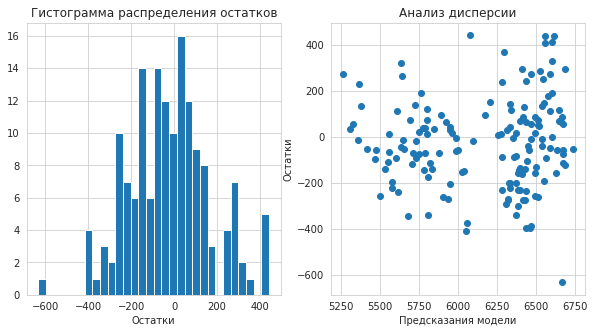

In [54]:
#разбиваем данные
# создание константы RANDOM_STATE
RANDOM_STATE = 42
# выделяем в отдельные переменные целевой признак и входные признаки
X2 = ferma_main[['eke_2','spo_bin','age', 'dad_breed','pasture_type']]
y2 = ferma_main['milk_yield_kg']
# разделите данные на тренировочные и тестовые, зафиксируйте random_state
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, 
    y2, 
    random_state=RANDOM_STATE)

#кодируем категориальные признаки
cat_col_names2 = ['age', 'dad_breed', 'pasture_type', 'spo_bin'] #категориальные признаки
# создаем переменную с экземпляром класса OneHotEncoder()
# включаем параметр для избегания появления дамми-ошибок,
# отключаем sparse-отображение
encoder2 = OneHotEncoder(sparse=False, drop='first')
# обучаем и трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe2 = encoder2.fit_transform(X_train2[cat_col_names2])
# выполняем преобразование категориальных признаков в тестовой выборке
X_test_ohe2 = encoder2.transform(X_test2[cat_col_names2])
# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names2 = encoder2.get_feature_names()
# создаём тренировочный и тестовый датафреймы из отмасштабированных данных
X_train_ohe2 = pd.DataFrame(X_train_ohe2, columns=encoder_col_names2)
X_test_ohe2 = pd.DataFrame(X_test_ohe2, columns=encoder_col_names2)
#смотрим результат
print(X_train_ohe2.head())
X_test_ohe2.head()

#масштабируем количественные признаки
num_col_names2 = ['eke_2']#количественные признаки
# создаем переменную с экземпляром класса StandardScaler()
scaler2 = StandardScaler()
# обучаем и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled2 = scaler2.fit_transform(X_train2[num_col_names2])

# выполняем преобразование количественных признаков в тестовой выборке
X_test_scaled2 = scaler2.transform(X_test2[num_col_names2])

#создаём тренировочный и тестовый датафреймы из отмасштабированных данных
X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=num_col_names2)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns=num_col_names2)
#смотрим результат
print(X_train_scaled2.head())
X_test_scaled2.head()

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train2 = pd.concat([X_train_ohe2, X_train_scaled2], axis=1)
X_test2 = pd.concat([X_test_ohe2, X_test_scaled2], axis=1)

# выведите пять первых строк из тренировочного датафрейма командой print()
print(X_train2.head(5))


#ОБУЧАЕМ МОДЕЛЬ
# инициализируем модель линейной регрессии
model_lr2  = LinearRegression()

# обучаем модель на тренировочных данных
model_lr2.fit(X_train2, y_train2)

# получаем предсказания модели на тестовых данных 
predictions2 = model_lr2.predict(X_test2)

# вывод вторых предсказанного и настоящего значений
print(predictions2[1], y_test2.reset_index(drop=True)[1])

#оцениваем качество модели на тестовой выборке: рассчитываем R², анализируем остатки с помощью графиков
#рассчитаем коэффициент детерминации
r2 = r2_score(y_test2, predictions2)
# выведите полученное значение R2
print("R2 LinearRegression =", r2)

#анализируем остатки с помощью графиков
# рассчитаем остатки
residuals2 = y_test2 - predictions2
# строим графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals2, bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions2, residuals2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Сравним результат первой и второй модели.

У первой модели детерминант R2 был равен 0.7791 

У второй модели детерминант R2 равен 0.8146. Качество модели улучшилось.

Дисперсия как у первой, так и у второй модели распределена неравномерно.

На гистограмме распределения остатков нет заметных изменений, распределение по прежнему похоже на нормальное.

#### Третья модель

Добавьте в данные новый признак и обучите на них третью модель LinearRegression.
Добавьте признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.
Устраните нелинейность между признаками.
Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.

In [55]:
#объединим датафреймы по id
ferma_main = pd.merge(ferma_main, ferma_dad, on='id', how='left')
ferma_main.head()

,id,milk_yield_kg,eke,crude_protein_g,spo,breed,pasture_type,dad_breed,fat_percent,protein_percent,taste,age,spo_bin,eke_2,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,1,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,0,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,1,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,1,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,0,0,163.84,Барин


   x0_1  x1_Соверин  x2_Холмистое  x3_1  x4_Буйный  x4_Геркулес  x4_Соловчик
0   1.0         1.0           1.0   1.0        0.0          0.0          1.0
1   0.0         1.0           1.0   0.0        0.0          0.0          0.0
2   1.0         0.0           0.0   0.0        1.0          0.0          0.0
3   1.0         0.0           1.0   1.0        1.0          0.0          0.0
4   1.0         0.0           0.0   0.0        0.0          1.0          0.0
      eke_2
0  1.577968
1 -1.511438
2  0.082269
3 -0.150235
4 -1.102358
   x0_1  x1_Соверин  x2_Холмистое  x3_1  x4_Буйный  x4_Геркулес  x4_Соловчик  \
0   1.0         1.0           1.0   1.0        0.0          0.0          1.0   
1   0.0         1.0           1.0   0.0        0.0          0.0          0.0   
2   1.0         0.0           0.0   0.0        1.0          0.0          0.0   
3   1.0         0.0           1.0   1.0        1.0          0.0          0.0   
4   1.0         0.0           0.0   0.0        0.0          1.0   

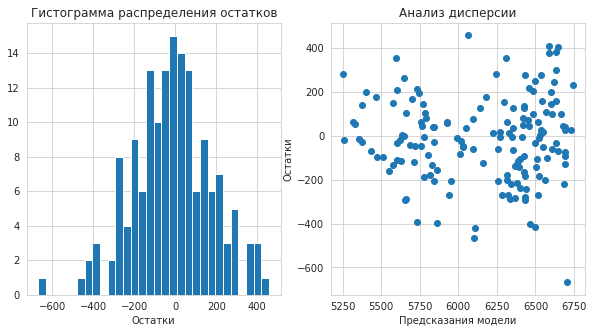

In [56]:
#разбиваем данные
# создание константы RANDOM_STATE
RANDOM_STATE = 42
# выделяем в отдельные переменные целевой признак и входные признаки
X3 = ferma_main[['eke_2','spo_bin','age', 'dad_breed','pasture_type', 'dad_name']]
y3 = ferma_main['milk_yield_kg']
# разделите данные на тренировочные и тестовые, зафиксируйте random_state
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, 
    y3, 
    random_state=RANDOM_STATE)

#кодируем категориальные признаки
cat_col_names3 = ['age', 'dad_breed', 'pasture_type', 'spo_bin', 'dad_name'] #категориальные признаки
# создаем переменную с экземпляром класса OneHotEncoder()
# включаем параметр для избегания появления дамми-ошибок,
# отключаем sparse-отображение
encoder3 = OneHotEncoder(sparse=False, drop='first')
# обучаем и трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe3 = encoder3.fit_transform(X_train3[cat_col_names3])
# выполняем преобразование категориальных признаков в тестовой выборке
X_test_ohe3 = encoder3.transform(X_test3[cat_col_names3])
# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names3 = encoder3.get_feature_names()
# создаём тренировочный и тестовый датафреймы из отмасштабированных данных
X_train_ohe3 = pd.DataFrame(X_train_ohe3, columns=encoder_col_names3)
X_test_ohe3 = pd.DataFrame(X_test_ohe3, columns=encoder_col_names3)
#смотрим результат
print(X_train_ohe3.head())
X_test_ohe3.head()

#масштабируем количественные признаки
num_col_names3 = ['eke_2']#количественные признаки
# создаем переменную с экземпляром класса StandardScaler()
scaler3 = StandardScaler()
# обучаем и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled3 = scaler3.fit_transform(X_train3[num_col_names3])

# выполняем преобразование количественных признаков в тестовой выборке
X_test_scaled3 = scaler3.transform(X_test3[num_col_names3])

#создаём тренировочный и тестовый датафреймы из отмасштабированных данных
X_train_scaled3 = pd.DataFrame(X_train_scaled3, columns=num_col_names3)
X_test_scaled3 = pd.DataFrame(X_test_scaled3, columns=num_col_names3)
#смотрим результат
print(X_train_scaled3.head())
X_test_scaled3.head()

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train3 = pd.concat([X_train_ohe3, X_train_scaled3], axis=1)
X_test3 = pd.concat([X_test_ohe3, X_test_scaled3], axis=1)

# выведите пять первых строк из тренировочного датафрейма командой print()
print(X_train3.head(5))


#ОБУЧАЕМ МОДЕЛЬ
# инициализируем модель линейной регрессии
model_lr3  = LinearRegression()

# обучаем модель на тренировочных данных
model_lr3.fit(X_train3, y_train3)

# получаем предсказания модели на тестовых данных 
predictions3 = model_lr3.predict(X_test3)

# вывод вторых предсказанного и настоящего значений
print(predictions3[1], y_test3.reset_index(drop=True)[1])

#оцениваем качество модели на тестовой выборке: рассчитываем R², анализируем остатки с помощью графиков
#рассчитаем коэффициент детерминации
r2_3 = r2_score(y_test3, predictions3)
# выведите полученное значение R2
print("R2 LinearRegression =", r2)

#анализируем остатки с помощью графиков
# рассчитаем остатки
residuals3 = y_test3 - predictions3
# строим графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals3, bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions3, residuals3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()


В результате обучения третьей модели получили немного лучше значение детерминанта 0.8194.

Улучшилось распедерение остатков, основные значение распределены в диапазоне между -200 и 200, график более всего из всех предыдущих поход на нормальное распределение.

На графике дисперсии распределение стало равномернее, по сравнение в предыдущими испытаниями.

#### Оценка качества каждой модели по трём метрикам: MSE, MAE, RMSE.

In [57]:
#расчитаем метрики MSE, MAE, RMS для всех трех моделей
mse1 = mean_squared_error(y_test, predictions1)
rmse1 = mean_squared_error(y_test, predictions1, squared=False) 
mae1 = mean_absolute_error(y_test, predictions1)

mse2 = mean_squared_error(y_test2, predictions2)
rmse2 = mean_squared_error(y_test2, predictions2, squared=False) 
mae2 = mean_absolute_error(y_test2, predictions2)

mse3 = mean_squared_error(y_test3, predictions3)
rmse3 = mean_squared_error(y_test3, predictions3, squared=False) 
mae3 = mean_absolute_error(y_test3, predictions3)

print('MSE, RMSE, MAE для 1 модели:', mse1.round(4),'  ', rmse1.round(4), '  ', mae1.round(4))
print('MSE, RMSE, MAE для 2 модели:', mse2.round(4),'  ',rmse2.round(4),'  ',mae2.round(4))
print('MSE, RMSE, MAE для 3 модели:', mse3.round(4),'  ',rmse3.round(4),'  ',mae3.round(4))

MSE, RMSE, MAE для 1 модели: 44952.52    212.0201    171.7127
MSE, RMSE, MAE для 2 модели: 37729.167    194.24    152.7502
MSE, RMSE, MAE для 3 модели: 36755.7777    191.718    149.2553


In [58]:
#Укажите доверительный интервал прогноза лучшей модели. Для этого рассчитайте квантили ошибки модели на тренировочных данных.
# Расчет квантилей ошибки модели
quantile_errors = y_test3 - predictions3
quantiles=(0.025, 0.975)

# Определение доверительного интервала
lower_quantile = np.quantile(quantile_errors, quantiles[0])
upper_quantile = np.quantile(quantile_errors, quantiles[1])
confidence_interval = (predictions3.mean() + lower_quantile, predictions3.mean() + upper_quantile)

print(f"Доверительный интервал прогноза: [{confidence_interval}]")

Доверительный интервал прогноза: [(5754.1044280132355, 6534.831580846224)]


С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.
Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получите прогноз удоя коров.

In [59]:
#добавим в датасет cow_buy недостающие признаки
#берем среднее значение из исходного датасета и увеличиваем на 5%
cow_buy['eke']=ferma_main['eke'].mean()*1.05 
cow_buy['spo']=ferma_main['spo'].mean()*1.05 
cow_buy['crude_protein_g']=ferma_main['crude_protein_g'].mean()*1.05 
#проверим результат
cow_buy.head()

,breed,pasture_type,dad_breed,dad_name,fact_fat_percent,fact_protein_percent,age,eke,spo,crude_protein_g
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,0.958744,2019.947532
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,0.958744,2019.947532
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.276162,0.958744,2019.947532
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.276162,0.958744,2019.947532
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.276162,0.958744,2019.947532


In [60]:
#устраним нелинейную зависимость между СПО и Удоем, разделив СПО на две категории, "меньше 0.92" = 1 и "больше 0.92" = 2
cow_buy['spo_bin']=cow_buy['spo'].apply(lambda x: 1 if x >=0.92 else 0).astype('int64')

#устраним нелинейную зависимость между ЭКЕ и Удоем, добавим новый признак ЭКЕ в квадрате
cow_buy['eke_2']=cow_buy['eke']**2
#проверим результат
cow_buy.head()


,breed,pasture_type,dad_breed,dad_name,fact_fat_percent,fact_protein_percent,age,eke,spo,crude_protein_g,spo_bin,eke_2
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,0.958744,2019.947532,1,233.361138
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,0.958744,2019.947532,1,233.361138
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.276162,0.958744,2019.947532,1,233.361138
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.276162,0.958744,2019.947532,1,233.361138
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.276162,0.958744,2019.947532,1,233.361138


In [61]:
#кодируем категориальные признаки
cat_col_names4 = ['age', 'dad_breed', 'pasture_type', 'spo_bin', 'dad_name'] #категориальные признаки

# выполняем преобразование категориальных признаков в новой тестовой выборке
X_test_ohe4 = encoder3.transform(cow_buy[cat_col_names4])
# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names4 = encoder3.get_feature_names()

# создаём тестовый датафреймы из отмасштабированных данных
X_test_ohe4 = pd.DataFrame(X_test_ohe4, columns=encoder_col_names4)
#смотрим результат
print(X_test_ohe4.head())

#масштабируем количественные признаки
num_col_names4 = ['eke_2']#количественные признаки

# выполняем преобразование количественных признаков в тестовой выборке
X_test_scaled4 = scaler3.transform(cow_buy[num_col_names4])

#создаём тренировочный и тестовый датафреймы из отмасштабированных данных
X_test_scaled4 = pd.DataFrame(X_test_scaled4, columns=num_col_names4)
#смотрим результат
print(X_test_scaled4.head())


# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок


cow_buy4 = pd.concat([X_test_ohe4, X_test_scaled4], axis=1)

# выведите пять первых строк из тренировочного датафрейма командой print()
print(cow_buy4.head(5))



# получаем предсказания модели на тестовых данных 
predictions4 = model_lr3.predict(cow_buy4)

#добавим столбец с предсказанным удоем в основной датасет с коровами на покупку
cow_buy4['milk_yield_kg'] = predictions4


cow_buy['milk_yield_kg']=predictions4
cow_buy

   x0_1  x1_Соверин  x2_Холмистое  x3_1  x4_Буйный  x4_Геркулес  x4_Соловчик
0   1.0         0.0           1.0   1.0        0.0          1.0          0.0
1   0.0         1.0           0.0   1.0        1.0          0.0          0.0
2   1.0         1.0           0.0   1.0        0.0          0.0          0.0
3   1.0         0.0           1.0   1.0        1.0          0.0          0.0
4   1.0         0.0           0.0   1.0        1.0          0.0          0.0
      eke_2
0  0.542248
1  0.542248
2  0.542248
3  0.542248
4  0.542248
   x0_1  x1_Соверин  x2_Холмистое  x3_1  x4_Буйный  x4_Геркулес  x4_Соловчик  \
0   1.0         0.0           1.0   1.0        0.0          1.0          0.0   
1   0.0         1.0           0.0   1.0        1.0          0.0          0.0   
2   1.0         1.0           0.0   1.0        0.0          0.0          0.0   
3   1.0         0.0           1.0   1.0        1.0          0.0          0.0   
4   1.0         0.0           0.0   1.0        1.0          0.0   

,breed,pasture_type,dad_breed,dad_name,fact_fat_percent,fact_protein_percent,age,eke,spo,crude_protein_g,spo_bin,eke_2,milk_yield_kg
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,0.958744,2019.947532,1,233.361138,6599.657944
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,0.958744,2019.947532,1,233.361138,6360.970819
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6266.390352
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.276162,0.958744,2019.947532,1,233.361138,6572.591821
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6516.198328
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,0,15.276162,0.958744,2019.947532,1,233.361138,6388.036942
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,0.958744,2019.947532,1,233.361138,6599.657944
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1,15.276162,0.958744,2019.947532,1,233.361138,6562.112829
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6266.390352
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.276162,0.958744,2019.947532,1,233.361138,6371.449811


Прогноз удоя коров получен и представлен в столбце milk_yield_kg датасета cow_buy.

## Обучение модели логистической регрессии

Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.
Используйте в качестве целевого признак Вкус молока.
При необходимости преобразуйте имеющиеся или добавьте новые признаки.
Разбейте данные на тренировочную и тестовую выборки.
Кодируйте категориальные признаки с помощью OneHotEncoder.
Масштабируйте количественные признаки с помощью StandardScaler.
Обучите модель логистической регрессии на подготовленных данных.
Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
Постройте матрицу ошибок.

In [62]:
ferma_main.head()

,id,milk_yield_kg,eke,crude_protein_g,spo,breed,pasture_type,dad_breed,fat_percent,protein_percent,taste,age,spo_bin,eke_2,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,1,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,0,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,1,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,1,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,0,0,163.84,Барин


In [63]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               628 non-null    int64  
 1   milk_yield_kg    628 non-null    int64  
 2   eke              628 non-null    float64
 3   crude_protein_g  628 non-null    int64  
 4   spo              628 non-null    float64
 5   breed            628 non-null    object 
 6   pasture_type     628 non-null    object 
 7   dad_breed        628 non-null    object 
 8   fat_percent      628 non-null    float64
 9   protein_percent  628 non-null    float64
 10  taste            628 non-null    int64  
 11  age              628 non-null    int64  
 12  spo_bin          628 non-null    int64  
 13  eke_2            628 non-null    float64
 14  dad_name         628 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 78.5+ KB


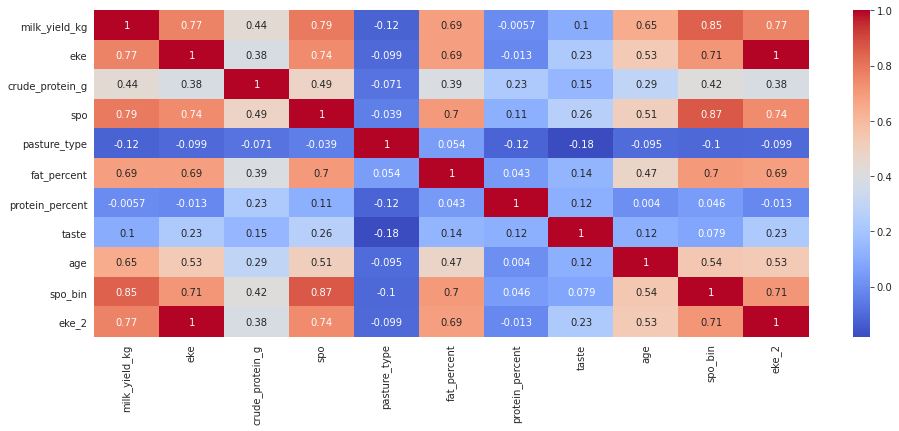

In [64]:
#снова посмотрим на коэффициеты корреляции, но уже относительно целевого признака "Вкус молока"
ferma_main_corr=ferma_main.drop(columns=['id'], axis=1) #исключим id
ferma_main_corr['pasture_type']=ferma_main_corr['pasture_type'].apply(lambda x: 1 if x=='Равнинное' else 0).astype('int64')
plt.figure(figsize=(16, 6))
sns.heatmap(ferma_main_corr.corr(method='spearman'), cmap="coolwarm", annot=True)
plt.show()

Вкус молока больше всего коррелирует с ЭКЕ, СПО, типом пастбища и сырым протеином в корме.

#### Разбиваем исходные данные

In [65]:
ferma_main.head()

,id,milk_yield_kg,eke,crude_protein_g,spo,breed,pasture_type,dad_breed,fat_percent,protein_percent,taste,age,spo_bin,eke_2,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,1,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,0,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,1,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,1,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,0,0,163.84,Барин


In [66]:
#разбиваем данные
# создание константы RANDOM_STATE
RANDOM_STATE = 42
# выделяем в отдельные переменные целевой признак и входные признаки
X = ferma_main[['eke_2','spo_bin','pasture_type', 'crude_protein_g']]
y = ferma_main['taste']
# разделите данные на тренировочные и тестовые, зафиксируйте random_state
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

#### Подготовка категориальных признаков

In [67]:
#кодируем категориальные признаки
cat_col_names4 = ['pasture_type', 'spo_bin'] 
encoder4 = OneHotEncoder(sparse=False, drop='first')
# обучаем и трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe4 = encoder4.fit_transform(X_train4[cat_col_names4])

# выполняем преобразование категориальных признаков в тестовой выборке
X_test_ohe4 = encoder4.transform(X_test4[cat_col_names4])
# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names4 = encoder4.get_feature_names()
# создаём тренировочный и тестовый датафреймы из отмасштабированных данных
X_train_ohe4 = pd.DataFrame(X_train_ohe4, columns=encoder_col_names4)
X_test_ohe4 = pd.DataFrame(X_test_ohe4, columns=encoder_col_names4)
#смотрим результат
print(X_train_ohe4.head())
X_test_ohe4.head(10)

   x0_Холмистое  x1_1
0           1.0   1.0
1           1.0   0.0
2           0.0   0.0
3           1.0   1.0
4           0.0   0.0


,x0_Холмистое,x1_1
0,1.0,0.0
1,1.0,1.0
2,1.0,0.0
3,0.0,0.0
4,1.0,0.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,0.0,1.0
9,0.0,0.0


#### Подготовка количественных признаков

In [68]:
#масштабируем количественные признаки
num_col_names4 = ['eke_2', 'crude_protein_g']#количественные признаки
# создаем переменную с экземпляром класса StandardScaler()
scaler4 = StandardScaler()
# обучаем и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled4 = scaler4.fit_transform(X_train4[num_col_names4])

# выполняем преобразование количественных признаков в тестовой выборке
X_test_scaled4 = scaler4.transform(X_test4[num_col_names4])

#создаём тренировочный и тестовый датафреймы из отмасштабированных данных
X_train_scaled4 = pd.DataFrame(X_train_scaled4, columns=num_col_names4)
X_test_scaled4 = pd.DataFrame(X_test_scaled4, columns=num_col_names4)
#смотрим результат
print(X_train_scaled4.head())
X_test_scaled4.head()

      eke_2  crude_protein_g
0  1.577968         1.079523
1 -1.511438        -0.196920
2  0.082269        -1.386085
3 -0.150235         0.752230
4 -1.102358         0.828598


,eke_2,crude_protein_g
0,-0.527089,-0.813322
1,1.490346,0.026730
2,-0.527089,-0.682405
3,-0.961737,-1.058792
4,0.561660,-1.413360


#### Создаем новые тренировочный и тестовый датафреймы с подготовленными признаками

In [69]:
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train4 = pd.concat([X_train_ohe4, X_train_scaled4], axis=1)
X_test4 = pd.concat([X_test_ohe4, X_test_scaled4], axis=1)

# выведите пять первых строк из тренировочного датафрейма командой print()
print(X_train4.head(5))

   x0_Холмистое  x1_1     eke_2  crude_protein_g
0           1.0   1.0  1.577968         1.079523
1           1.0   0.0 -1.511438        -0.196920
2           0.0   0.0  0.082269        -1.386085
3           1.0   1.0 -0.150235         0.752230
4           0.0   0.0 -1.102358         0.828598


#### Обучаем модель на подготовленных данных. Получаем предсказания

In [70]:
#ОБУЧАЕМ МОДЕЛЬ
# инициализируем модель логистической регрессии
model_logr  = LogisticRegression()

# обучаем модель на тренировочных данных
model_logr.fit(X_train4, y_train4)

# получаем прогнозные метки классов на тестовых данных 
predictions4 = model_logr.predict(X_test4)
predictions4
#1 = вкусно, 0 = не вкусно

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0])

In [71]:
# проводим оценку точности
acc = accuracy_score(y_test4, predictions4)
print(acc)

#расчет recall и precision
recall = recall_score(y_test4,predictions4)
precision = precision_score(y_test4,predictions4)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

0.6114649681528662
recall:  0.841
precision:  0.612


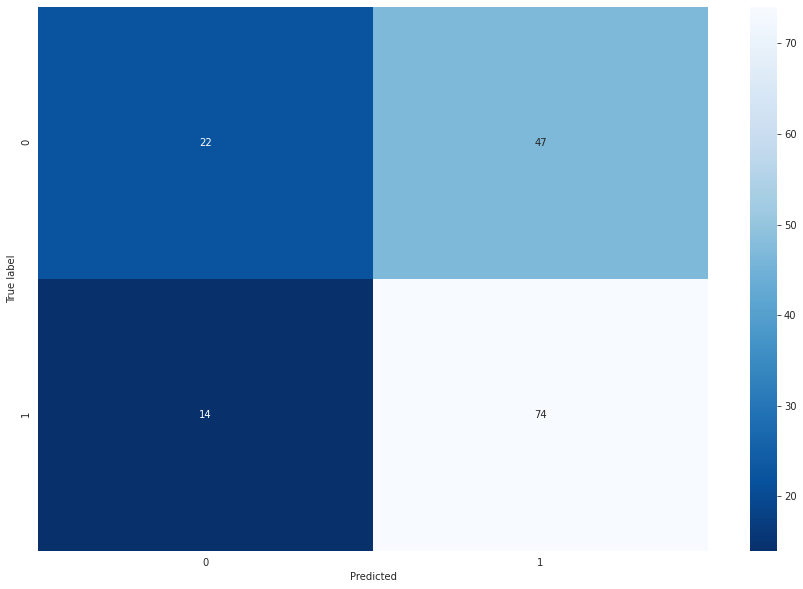

In [72]:
#построение матрицы ошибок
cm = confusion_matrix(y_test4, predictions4) #верные значения из тестовой выборки и предсказанные
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

По данным метрик делаем следующие выводы:

Модель верно предсказывает результат в 61% случаев.
Метрика recall показывает что, модель классификации смогла присвоить класс 1(вкусное молоко) 84% объектов этого класса.
Метрика precision показывает что лишь в 61% случаев модель правильно определяла молоко, как вкусное.
Матрица ошибок показывает, что модель ошибочно предсказывает вкус в 47 случаях на доступной выборке. 
У модели больше ошибок 1 рода, т.е. 47 случаев, когда вкусное молоко, было классифицировано, как невкусное.
Ошибок второго рода 14, т.е. в этих случаях невкусное молоко, было определено, как вкусное. Это ошибка для целей задачи критичнее, так как нам важно отобрать коров именно с вкусным молоком.
Надо привести ошибки 1 рода к минимуму, т.е. увеличить precision.

Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?

Подберем такое значение порога при котором модель будет чаще определять молоко, как вкусное.

In [73]:
#создадим таблицу с отсортированными предсказаниями и оценкой вероятности(y_proba)
y_proba = model_logr.predict_proba(X_test4)[:,1]
data = pd.DataFrame(
    zip(y_test4, y_proba), columns=['y_valid', 'y_proba']
).sort_values(by='y_proba', ascending=False)
data.head(5)

,y_valid,y_proba
146,1,0.863347
85,1,0.854432
114,1,0.847452
39,1,0.839419
152,1,0.831264


In [74]:
#разделим промежуток от 0.1 до 1 на 100 порогов
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 100,endpoint=False)]
print(thresholds) 

[0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.96, 0.97, 0.98, 0.99]


In [75]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
print(data.sample(5))

     y_valid   y_proba  y_pred_0.1  y_pred_0.11  y_pred_0.12  y_pred_0.13  \
57         0  0.714614           1            1            1            1   
59         0  0.607915           1            1            1            1   
71         0  0.503828           1            1            1            1   
109        1  0.620116           1            1            1            1   
5          0  0.536869           1            1            1            1   

     y_pred_0.14  y_pred_0.15  y_pred_0.16  y_pred_0.17  ...  y_pred_0.9  \
57             1            1            1            1  ...           0   
59             1            1            1            1  ...           0   
71             1            1            1            1  ...           0   
109            1            1            1            1  ...           0   
5              1            1            1            1  ...           0   

     y_pred_0.91  y_pred_0.92  y_pred_0.93  y_pred_0.94  y_pred_0.95  \
57      

In [76]:
#сортировка предсказанных значений и вывод самых точных
y_proba = model_logr.predict_proba(X_test4)[:,1]

#разделим промежуток от 0.1 до 1 на 100 порогов
thresholds = np.linspace(0.1, 1.0, num = 100, endpoint=True)
precision_values=[]

In [77]:
#рассчитаем precision для каждого порога
for i in thresholds:
    #определяем оценку предсказания для какждого порога
    #если y_proba больше или равно i, то с помощью astype записываем в y_pred число 1, иначе 0
    y_pred = (y_proba >= i).astype(int)
    # Вычисляем precision для текущего порога
    precision = precision_score(y_test4, y_pred, zero_division=0)
    # Добавляем значение precision в список
    precision_values.append((i, precision))
# Создаем DataFrame из результатов
df_precision= pd.DataFrame(precision_values, columns=['Порог', 'precision'])  

In [78]:
# Выводим DataFrame с порогами и их соответствующими метриками precision
df_precision.sort_values(by='precision')

,Порог,precision
99,1.000000,0.000000
98,0.990909,0.000000
84,0.863636,0.000000
85,0.872727,0.000000
86,0.881818,0.000000
...,...,...
71,0.745455,0.956522
82,0.845455,1.000000
81,0.836364,1.000000
80,0.827273,1.000000


In [79]:
a=df_precision.query('precision==1').sort_values(by='Порог')
a['Порог'].min()

0.8272727272727273

precision становится равным 1 при пороге от 0.83

recall:  0.06
precision:  1.0


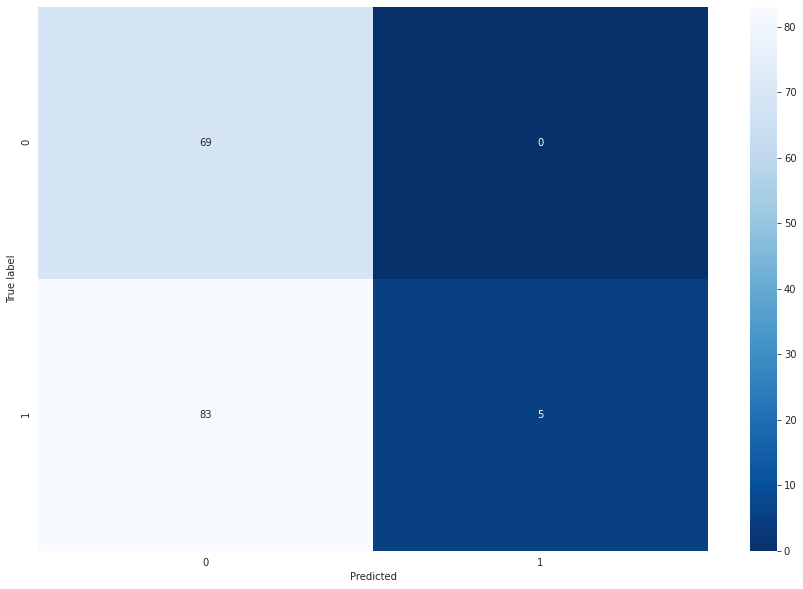

In [80]:
#рассчитаем значение recall и precision для порога 0.83


#y_test4 наши реальные значения, predictions5 значения для порога 0.83
predictions5=(y_proba>=0.83).astype(int)

#расчет recall и precision
recall = recall_score(y_test4,predictions5)
precision = precision_score(y_test4,predictions5)

print('recall: ',round(recall ,2))
print('precision: ',round(precision,2))

#построение матрицы ошибок
cm = confusion_matrix(y_test4, predictions5) #верные значения из тестовой выборки и предсказанные
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Из матрицы ошибок видно что, ошибки первого рода сведены к нулю, precision равно 1, а это значит, что модель не предскажет невкусное молоко, как вкусно, что и является одной из целей. Но recall стала равно 0.05, т.е. модель плохо прогнозирует вкусное молоко. В части предсказания вкусного молока модель можно улучшить пересматривая входные признаки или добовляя дополнительные.

С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получите прогноз вкуса молока коров.

#### Прогноз вкуса молока коров для покупки

##### Подготовка данных

In [81]:
cow_buy.head()

,breed,pasture_type,dad_breed,dad_name,fact_fat_percent,fact_protein_percent,age,eke,spo,crude_protein_g,spo_bin,eke_2,milk_yield_kg
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,0.958744,2019.947532,1,233.361138,6599.657944
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,0.958744,2019.947532,1,233.361138,6360.970819
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6266.390352
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.276162,0.958744,2019.947532,1,233.361138,6572.591821
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6516.198328


In [82]:
#кодируем категориальные признаки
cat_col_names_buy = ['pasture_type', 'spo_bin'] 

# трансформируем категориальные признаки из тестовой выборки 
X_test_ohe_buy = encoder4.transform(cow_buy[cat_col_names_buy])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names_buy = encoder4.get_feature_names()
                                       
# создаём тестовый датафреймы из отмасштабированных данных
cow_buy_ohe_i = pd.DataFrame(X_test_ohe_buy, columns=encoder_col_names_buy)
#смотрим результат

cow_buy_ohe_i.head(10)

,x0_Холмистое,x1_1
0,1.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,1.0
4,0.0,1.0
5,0.0,1.0
6,1.0,1.0
7,0.0,1.0
8,0.0,1.0
9,1.0,1.0


In [83]:
#масштабируем количественные признаки
num_col_names_buy = ['eke_2','crude_protein_g']#количественные признаки

#трансформируем количественные признаки из тестовой выборки 
X_test_scaled_buy = scaler4.transform(cow_buy[num_col_names_buy])

#создаём тестовый датафреймы из отмасштабированных данных
cow_buy_scaled_i = pd.DataFrame(X_test_scaled_buy, columns=num_col_names_buy)
#смотрим результат
cow_buy_scaled_i.head()

,eke_2,crude_protein_g
0,0.542248,0.517384
1,0.542248,0.517384
2,0.542248,0.517384
3,0.542248,0.517384
4,0.542248,0.517384


In [84]:
# объединяем все преобразованные данные в тестовый датафрейм
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

cow_buy_test = pd.concat([cow_buy_ohe_i, cow_buy_scaled_i], axis=1)

# выведите пять первых строк из тренировочного датафрейма командой print()
print(cow_buy_test.head(5))

   x0_Холмистое  x1_1     eke_2  crude_protein_g
0           1.0   1.0  0.542248         0.517384
1           0.0   1.0  0.542248         0.517384
2           0.0   1.0  0.542248         0.517384
3           1.0   1.0  0.542248         0.517384
4           0.0   1.0  0.542248         0.517384


In [85]:
# получаем прогнозные метки классов на тестовых данных для порога 0.5
cow_buy_pred = model_logr.predict(cow_buy_test)
cow_buy_pred
#1 = вкусно, 0 = не вкусно

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [86]:
cow_buy['taste']=cow_buy_pred
cow_buy

,breed,pasture_type,dad_breed,dad_name,fact_fat_percent,fact_protein_percent,age,eke,spo,crude_protein_g,spo_bin,eke_2,milk_yield_kg,taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,0.958744,2019.947532,1,233.361138,6599.657944,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,0.958744,2019.947532,1,233.361138,6360.970819,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6266.390352,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.276162,0.958744,2019.947532,1,233.361138,6572.591821,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6516.198328,1
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,0,15.276162,0.958744,2019.947532,1,233.361138,6388.036942,1
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,0.958744,2019.947532,1,233.361138,6599.657944,1
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1,15.276162,0.958744,2019.947532,1,233.361138,6562.112829,1
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6266.390352,1
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.276162,0.958744,2019.947532,1,233.361138,6371.449811,1


In [87]:
#получим оценки вероятностей
cow_buy_prob = model_logr.predict_proba(cow_buy_test)[:,1]
data2 = pd.DataFrame(
    zip(cow_buy_pred, cow_buy_prob), columns=['cow_buy_valid', 'cow_buy_proba']
).sort_values(by='cow_buy_proba', ascending=False)
data2

,cow_buy_valid,cow_buy_proba
0,1,0.706496
9,1,0.706496
16,1,0.706496
15,1,0.706496
13,1,0.706496
12,1,0.706496
10,1,0.706496
6,1,0.706496
3,1,0.706496
7,1,0.569258


In [88]:
# получаем прогнозные метки классов на тестовых данных для порога 0.83
# выведем вероятности принадлежности в классам 0 и 1
cow_buy_proba = model_logr.predict_proba(cow_buy_test)
cow_buy_proba

array([[0.29350428, 0.70649572],
       [0.43074218, 0.56925782],
       [0.43074218, 0.56925782],
       [0.29350428, 0.70649572],
       [0.43074218, 0.56925782],
       [0.43074218, 0.56925782],
       [0.29350428, 0.70649572],
       [0.43074218, 0.56925782],
       [0.43074218, 0.56925782],
       [0.29350428, 0.70649572],
       [0.29350428, 0.70649572],
       [0.43074218, 0.56925782],
       [0.29350428, 0.70649572],
       [0.29350428, 0.70649572],
       [0.43074218, 0.56925782],
       [0.29350428, 0.70649572],
       [0.29350428, 0.70649572],
       [0.43074218, 0.56925782],
       [0.43074218, 0.56925782],
       [0.43074218, 0.56925782]])

In [89]:
# выберем вероятности класса 1
predictions6 = cow_buy_proba[:, 1]
predictions6

array([0.70649572, 0.56925782, 0.56925782, 0.70649572, 0.56925782,
       0.56925782, 0.70649572, 0.56925782, 0.56925782, 0.70649572,
       0.70649572, 0.56925782, 0.70649572, 0.70649572, 0.56925782,
       0.70649572, 0.70649572, 0.56925782, 0.56925782, 0.56925782])

In [90]:
# Используем порог для классификации 0.83
threshold_83 = 0.83
y_pred_83 = (predictions6 >= threshold_83).astype(int)

# Вывод результатов
print(y_pred_83)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Для порога при котором точно не будет неверное предсказанного молока предсказанный вкус молока для все коров планируемых к покупке получился равным 0, т.е. по вкусовым характеристикам молока ни одна корова для покупки не подходит.

In [91]:
cow_buy['taste']=y_pred_83
cow_buy

,breed,pasture_type,dad_breed,dad_name,fact_fat_percent,fact_protein_percent,age,eke,spo,crude_protein_g,spo_bin,eke_2,milk_yield_kg,taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,0.958744,2019.947532,1,233.361138,6599.657944,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,0.958744,2019.947532,1,233.361138,6360.970819,0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6266.390352,0
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.276162,0.958744,2019.947532,1,233.361138,6572.591821,0
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6516.198328,0
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,0,15.276162,0.958744,2019.947532,1,233.361138,6388.036942,0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,0.958744,2019.947532,1,233.361138,6599.657944,0
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1,15.276162,0.958744,2019.947532,1,233.361138,6562.112829,0
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6266.390352,0
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.276162,0.958744,2019.947532,1,233.361138,6371.449811,0


## Итоговые выводы

In [92]:
#К исходным данным «ЭкоФермы», добавим прогнозы вкуса молока и удоя коров
cow_buy

,breed,pasture_type,dad_breed,dad_name,fact_fat_percent,fact_protein_percent,age,eke,spo,crude_protein_g,spo_bin,eke_2,milk_yield_kg,taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,0.958744,2019.947532,1,233.361138,6599.657944,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,0.958744,2019.947532,1,233.361138,6360.970819,0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6266.390352,0
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,1,15.276162,0.958744,2019.947532,1,233.361138,6572.591821,0
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6516.198328,0
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,0,15.276162,0.958744,2019.947532,1,233.361138,6388.036942,0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,0.958744,2019.947532,1,233.361138,6599.657944,0
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,1,15.276162,0.958744,2019.947532,1,233.361138,6562.112829,0
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,1,15.276162,0.958744,2019.947532,1,233.361138,6266.390352,0
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0,15.276162,0.958744,2019.947532,1,233.361138,6371.449811,0


In [93]:
#отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко
#ранее был определен доверительный интервал прогноза: [(5754.1044280132355, 6534.831580846224)], учтем его
cow_buy.query('milk_yield_kg < 6534.83' and 'taste!=0')

,breed,pasture_type,dad_breed,dad_name,fact_fat_percent,fact_protein_percent,age,eke,spo,crude_protein_g,spo_bin,eke_2,milk_yield_kg,taste


Исходя из имеющихся данных, построенных по ним моделям и полученным прогнозам, ни одна из коров не подходит для покупки, так как по предсказанию модели нет полного соответствият требованиям фермера.

Для получения более точного прогноза можно рекомендовать запросить дополнительные данные по коровам, например недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение), которые были заменены средними значениями увеличенными на 5%.

В данной задаче были использованы модели линейной регрессии и логистической регрессии.
Улучшение качества регрессионной модели выполнялось пошагово, сначала устранялась нелинейная зависимость между входными и целевым признаком с помощью перевода входного признака СПО в категориальный вид и с помощью возведения ЭКЕ в квадрат, далее к датафрейму был добавлен дополнительный входной признак "имя папы".
Улучшить модель можно, так как на данный момент результат самой лучшей регрессионной модели равен 82%, а результат логистической по метрике accuracy 61% Для улучшения можно запросить дополнительные или уточннные данные, пересмотреть набор коррелирующих признаков и исходя из этого расширить состав входных.

В данном проекте для анализа рисков использовались метрики accuracy, recall, precision и доверительный интервал прогноза. Наиболее важные из них для целей данного проекта precision и доверительный интервал прогноза.
Для того, чтобы в целевую выборку не попали коровы с невкусным молоков, были приведены к нулю ошибки первого рода, означающие, как часто невкусное молоко, классифицировалось, как вкусное.